# Labolatorium 2

importowanie bibliotek

In [68]:
import time
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
sns.set_palette("bright")

In [2]:
SAVE_PLOTS=True

In [3]:
if SAVE_PLOTS:
    os.makedirs("./plots",exist_ok=True)
    directory="./plots/"

# Zadanie 1

Przygotuj program generujący następujące zbiory punktów na płaszczyźnie
(współrzędne rzeczywiste typu double):

a) zawierający 100 losowo wygenerowanych punktów o współrzędnych z przedziału
[-100, 100],

b) zawierający 100 losowo wygenerowanych punktów leżących na okręgu o środku
(0,0) i promieniu R=10,

c) zawierający 100 losowo wygenerowanych punktów leżących na bokach prostokąta
o wierzchołkach (-10, 10), (-10,-10), (10,-10), (10,10),

d) zawierający wierzchołki kwadratu (0, 0), (10, 0), (10, 10), (0, 10) oraz punkty
wygenerowane losowo w sposób następujący: po 25 punktów na dwóch bokach
kwadratu leżących na osiach i po 20 punktów na przekątnych kwadratu.

### Podpunkt A

In [4]:
points_a = np.random.uniform(-100, 100, size =[100, 2])
table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
print(table_a)

            X          Y
0  -55.565506  37.069116
1  -48.905404 -75.534522
2  -84.416522 -40.412692
3   96.488631  87.810996
4   16.941379  87.489365
..        ...        ...
95 -96.830513 -67.562818
96  -1.955570  -5.450780
97 -85.696826  -6.407668
98 -72.024525  43.375048
99 -44.787084 -63.550527

[100 rows x 2 columns]


### Podpunkt B

In [5]:
points_b=[None for _ in range(100)]
for i in range(100):
    angle=np.random.uniform(0,2*np.pi)
    x=np.cos(angle)*10
    y=np.sin(angle)*10
    points_b[i]=(x,y)
table_b=pd.DataFrame(data=points_b, columns=['X','Y'])
print(table_b)

           X         Y
0  -7.745208  6.325485
1   0.559276  9.984348
2   9.605247  2.781948
3  -9.739668 -2.266909
4  -2.225277  9.749264
..       ...       ...
95 -8.105715 -5.856396
96  9.291274  3.697599
97 -2.996148  9.540603
98  2.347824  9.720479
99  8.543295 -5.197318

[100 rows x 2 columns]


### Podpunkt C

In [6]:
points_c=[[None,None] for _ in range(100)]
tens=[-10,10]
for i in range(100):
    # (0,2) ponieważ losuje liczbe całkowitą z przedziału 0 ≤ x < 2
    index_1=np.random.randint(0,2)
    index_2=np.random.randint(0,2)
    
    points_c[i][index_1]=tens[index_2]
    points_c[i][1-index_1]=np.random.uniform(-10,10)
    
    #pętla while zapobiega powstaniu punktów na krawędziach kwadratu
    while (points_c[i][0]==10 or points_c[i][0]==-10) and (points_c[i][1]==10 or points_c[i][1]==-10):
        index_1=np.random.randint(0,2)
        index_2=np.random.randint(0,2)
        points_c[i][index_1]=tens[index_2]
        points_c[i][1-index_1]=np.random.uniform(-10,10)
        
table_c=pd.DataFrame(data=points_c, columns=['X','Y'])
print(table_c)

            X          Y
0    8.519458 -10.000000
1  -10.000000  -7.224990
2    5.135664 -10.000000
3    7.206388  10.000000
4   10.000000  -9.297674
..        ...        ...
95  10.000000  -0.083297
96  -5.019682  10.000000
97 -10.000000  -7.138476
98 -10.000000  -8.148739
99  10.000000   0.171103

[100 rows x 2 columns]


### Podpunkt D

In [7]:
points_d=[ [None, None] for _ in range(94)]
for i in range(2):
    for j in range(25):
        points_d[(i*25)+j][i]=0
        points_d[(i*25)+j][1-i]=np.random.uniform(0,10)
for i in range(20):
    point=np.random.uniform(0,10)
    points_d[50+i][0]=point
    points_d[50+i][1]=point
    
    x=np.random.uniform(0,10)
    y=-x+10
    points_d[70+i][0]=x
    points_d[70+i][1]=y
    
points_d[90]=[0,0]
points_d[91]=[10,0]
points_d[92]=[10,10]
points_d[93]=[0,10]

table_d=pd.DataFrame(data=points_d, columns=['X','Y'])
print(table_d)

           X          Y
0    0.00000   7.184657
1    0.00000   7.493457
2    0.00000   3.829089
3    0.00000   8.460332
4    0.00000   3.319134
..       ...        ...
89   0.64555   9.354450
90   0.00000   0.000000
91  10.00000   0.000000
92  10.00000  10.000000
93   0.00000  10.000000

[94 rows x 2 columns]


# Zadanie 2

Uruchom wizualizację graficzną utworzonych zbiorów punktów.

### Zbiór punktów A

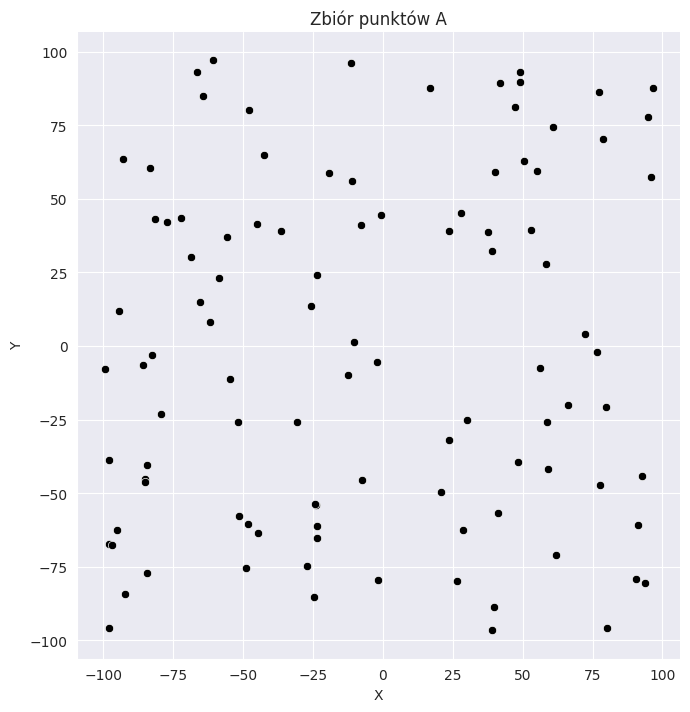

In [8]:
plot_a =sns.relplot(data=table_a ,x='X', y='Y', height=7, color="black").set(title="Zbiór punktów A")

### Zbiór punktów B

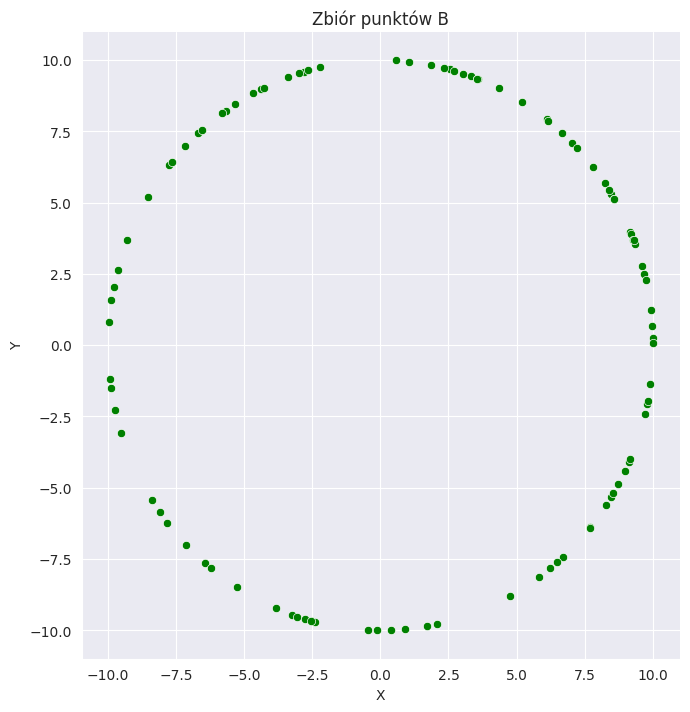

In [9]:
plot_b=sns.relplot(data=table_b, x='X', y='Y', height=7, color="green").set(title="Zbiór punktów B")

### Zbiór punktów C

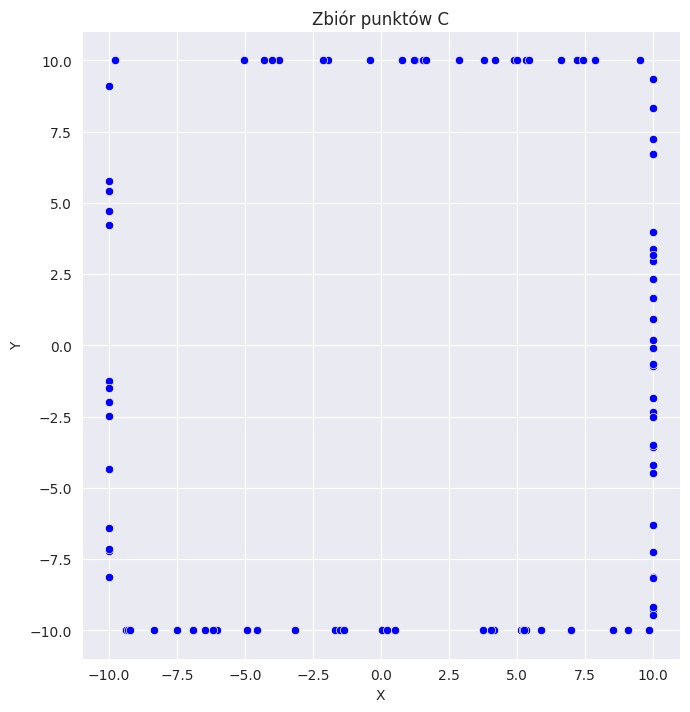

In [10]:
plot_c=sns.relplot(data=table_c, x='X', y='Y', height=7, color="blue").set(title="Zbiór punktów C")

### Zbiór punktów D

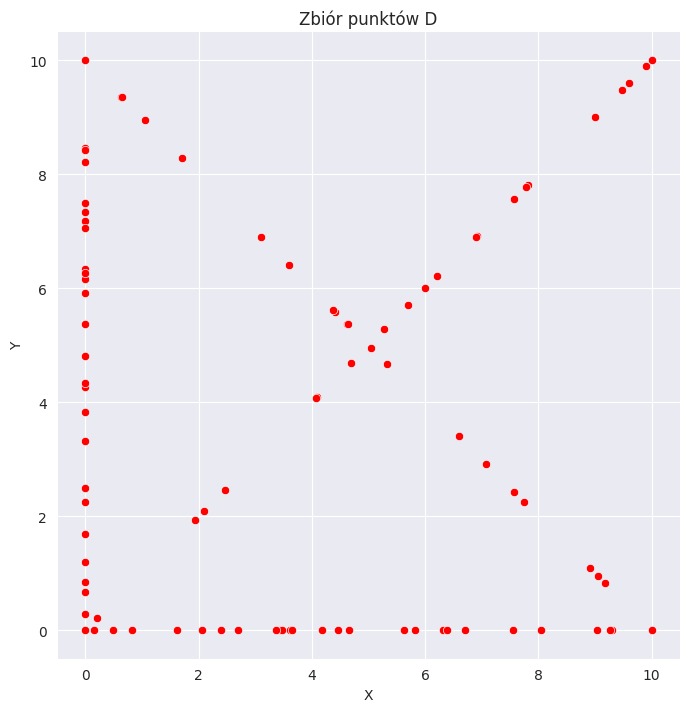

In [11]:
plot_c=sns.relplot(data=table_d, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów D")

# Zadanie 3

Zmodyfikuj program z punktu 1 tak, aby możliwe było zadawanie określonych
parametrów dla schematów losowania punktów podanych powyżej:

a) liczba punktów, przedziały dla współrzędnych,

b) liczba punktów, środek i promień okręgu,

c) liczba punktów, wierzchołki prostokąta,

d) wierzchołki kwadratu, liczba punktów na osiach, liczba punktów na przekątnych.

## a)

In [12]:
def setA(number_of_points, begin,end):
    points_a = np.random.uniform(begin, end, size =[number_of_points, 2])
    table_a = pd.DataFrame(data=points_a, columns=['X', 'Y'])
    return table_a

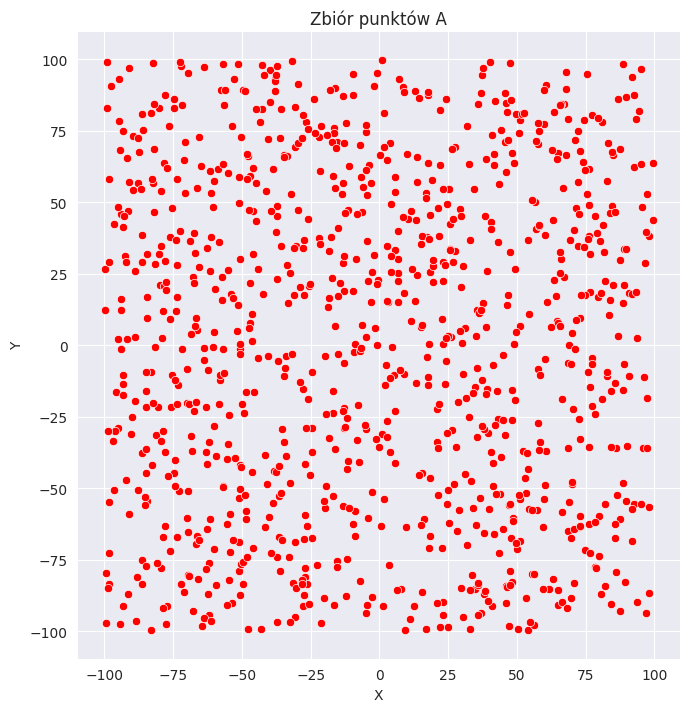

In [13]:
table=setA(1000,-100,100)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów A")

## b)

In [14]:
def setB(number_of_points, center, radius):
    points_b=[None for _ in range(number_of_points)]
    for i in range(number_of_points):
        angle=np.random.uniform(0, 2*np.pi)
        x=np.cos(angle)*radius + center[0]
        y=np.sin(angle)*radius + center[1]
        points_b[i]=(x,y)
    table_b=pd.DataFrame(data=points_b, columns=['X','Y'])
    return table_b

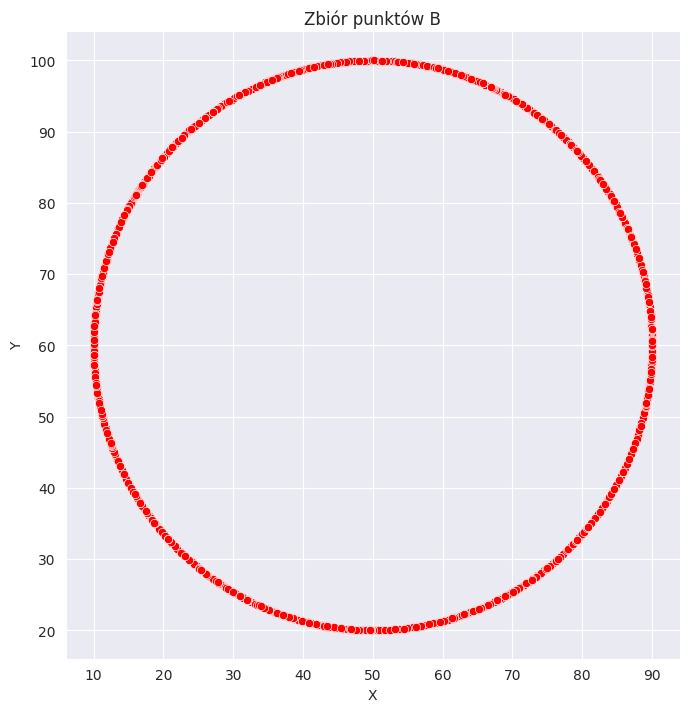

In [15]:
table=setB(10000,(50,60),40)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów B")

## c)

In [16]:
def setC(number_of_points, lowerLeft, upperRight):
    points_c=[[None,None] for _ in range(number_of_points)]
    xL=lowerLeft[0]
    xR=upperRight[0]
    yL=lowerLeft[1]
    yR=upperRight[1]
    
    for i in range(number_of_points):
        n = np.random.randint(0,4)
        if n==0:
            points_c[i][0]=xL
            points_c[i][1]=np.random.uniform(yL,yR)
            while points_c[i][1]==yR or points_c[i][1]==yL:
                points_c[i][1]=np.random.uniform(yL,yR)
            
        elif n==1:
            points_c[i][0]=xR
            points_c[i][1]=np.random.uniform(yL,yR)
            while points_c[i][1]==yR or points_c[i][1]==yL:
                points_c[i][1]=np.random.uniform(yL,yR)
            
            
        elif n==2:
            points_c[i][1]=yL
            points_c[i][0]=np.random.uniform(xL,xR)
            while points_c[i][0]==xR or points_c[i][0]==xL:
                points_c[i][0]=np.random.uniform(xL,xR)
            
            
        else:
            points_c[i][1]=yR
            points_c[i][0]=np.random.uniform(xL,xR)
            while points_c[i][0]==xR or points_c[i][0]==xL:
                points_c[i][0]=np.random.uniform(xL,xR)

    table_c=pd.DataFrame(data=points_c, columns=['X','Y'])
    return table_c

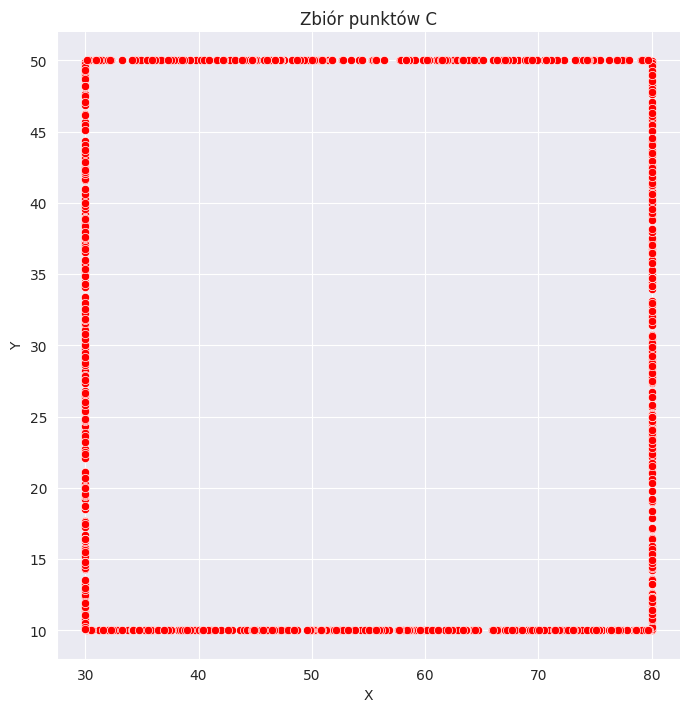

In [56]:
table=setC(1000, (30,10), (80,50))
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów C")

## d)

In [18]:
# lewym dolnym wierzchołkiem jest zawsze punkt (0,0)
def setD(upperRight, axis, borders):
    points_d=[ [None, None] for _ in range(axis+borders+4)]
    
    for j in range(axis):
        n=np.random.randint(0,2)
        if n==0:
            points_d[j][0]=0
            points_d[j][1]=np.random.uniform(0,upperRight[1])       
        elif n==1:
            points_d[j][n]=0
            points_d[j][1-n]=np.random.uniform(0,upperRight[0])
    
    for j in range(axis, axis+borders):
        n=np.random.randint(0,2)
        x=np.random.uniform(0,upperRight[0])
        if n==0:
            points_d[j][0]=x
            points_d[j][1]=x       
        elif n==1:
            points_d[j][0]=x
            points_d[j][1]=-x+upperRight[1]

    points_d[axis+borders]=[0,0]
    points_d[axis+borders+1]=[upperRight[0],0]
    points_d[axis+borders+2]=[upperRight[0],upperRight[1]]
    points_d[axis+borders+3]=[0,upperRight[1]]

    table_d=pd.DataFrame(data=points_d, columns=['X','Y'])
    return table_d

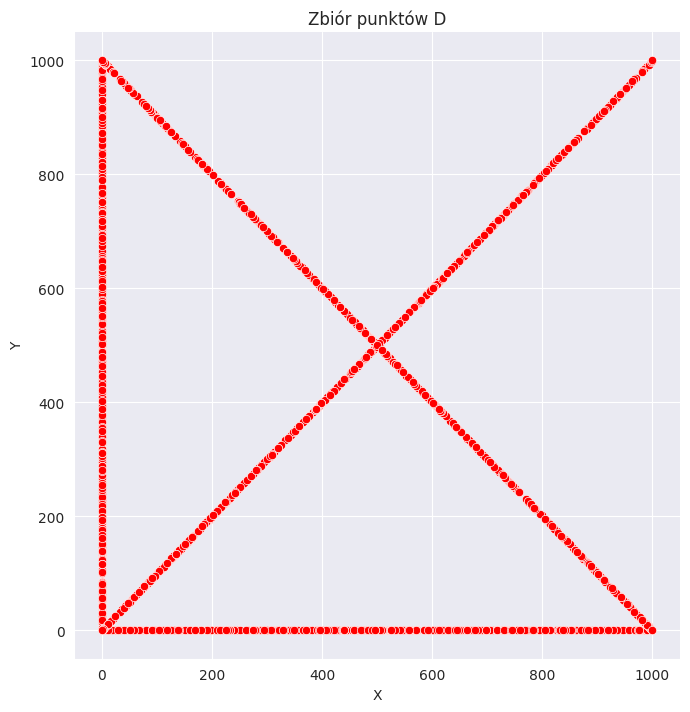

In [19]:
table=setD((1000,1000), 1000, 1000)
sns.relplot(data=table, x='X', y='Y', height=7, color="red").set(title="Zbiór punktów D")

# Zadanie 4

Zaimplementuj algorytmy Grahama oraz Jarvisa wyznaczające otoczkę wypukłą dla
zadanego zbioru punktów. Przetestuj program na zbiorach z punktu 1 oraz
zmodyfikowanych zbiorach z punktu 3. Program powinien pozwolić na zapisanie w
pliku wyniku działania, czyli ciągu wierzchołków otoczki. Dodaj możliwość
sprawdzenia czasu działania algorytmu.

## Funkcje wizualizujące działanie algorytmu

In [20]:
def makeplot(points, ch, title=None, filename=None, SAVE=False):
    x=points['X']
    y=points['Y']
    plt.scatter(x,y, color='black')
    x_ch=ch[0][:-1]
    y_ch=ch[1][:-1]
    plt.plot(x_ch, y_ch, '-o', color='blue')
    plt.plot(ch[0][-2:], ch[1][-2:], '-o', color='red')
    plt.title(title)
    if SAVE:
        plt.savefig(directory+filename)
    plt.show()

In [21]:
def makefinalplot(points,ch,title=None,filename=None,SAVE=False, jarvis=False):
    c='blue'
    if jarvis:
        c='green'
    x=points['X']
    y=points['Y']
    plt.scatter(x,y, color='black')
    x_ch=ch[0]
    y_ch=ch[1]
    ch[0].append(ch[0][0])
    ch[1].append(ch[1][0])
    plt.plot(x_ch, y_ch, '-o', color=c)
    plt.title(title)
    if SAVE:
        plt.savefig(directory+filename)
    plt.show()

### Stałe:

In [22]:
# Epsilon for det function
epsilon = 10**(-12)

### Funkcje pomocniczne:

In [23]:
def matrix_2x2(a,b,c):
    return [[a[0]-c[0], a[1]-c[1]], [ b[0]-c[0], b[1]-c[1]]]

def det_2x2(a,b,c):
    matrix=matrix_2x2(a,b,c)
    return (matrix[0][0]*matrix[1][1])-(matrix[0][1]*matrix[1][0])

def orientation(a,b,c):
    det = det_2x2(a,b,c)
    if det > epsilon:
        return 1
    elif det <-epsilon:
        return -1
    return 0

In [24]:
def distance(a,b):
    return np.sqrt((b[0]-a[0])**2+(b[1]-a[1])**2)

def partition(array, low, high, a):
    pivot = array[high]
    i = low - 1
    for j in range(low, high):
        if (orientation(a,array[j],pivot)==1) or (orientation(a,array[j],pivot)==0 and distance(a,array[j])>distance(a,pivot)):
            i = i + 1
            array[i], array[j] = array[j], array[i]
        
    array[i + 1], array[high] = array[high], array[i + 1]
    return i + 1 

def quickSort(array, low, high, a):
    if low < high:
        pi = partition(array, low, high,a)
        quickSort(array, low, pi - 1, a)
        quickSort(array, pi + 1, high, a)

## Algorytm Grahama

In [25]:
def most_left_point(table):
    index=0
    left_point=[np.inf,np.inf]
    for i in range(len(table)):
        x=table.loc[i,'X']
        y=table.loc[i,'Y']
        if x<left_point[0]:
            left_point[0]=x
            left_point[1]=y
            index=i
        elif x==left_point[0] and y<left_point[1]:
            left_point[1]=y
            index=i        
    return left_point, index

def graham_algorithm(table, show_steps=False, final_plot=None, save_plots=False, measure_time=False, save_file=False):
    
    first_point, index= most_left_point(table)
    points=[]
    for i in range(len(table)):
        points.append((table.loc[i,'X'], table.loc[i,'Y']))
    
    if measure_time:
        start=time.time()
        
    quickSort(points,0,len(points)-1,first_point)
    ch=[[points[0][0],points[1][0],points[2][0]],[points[0][1],points[1][1],points[2][1]]]
    
    i=3
    while i < len(points):
        removed=False
        point=points[i]
        orient=orientation((ch[0][-2],ch[1][-2]), (ch[0][-1],ch[1][-1]), point)
        if orient==0:
            ch[0].pop()
            ch[1].pop()
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
        elif orient==1:
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
        else:
            ch[0].pop()
            ch[1].pop()
            removed=True
            
        if len(ch[0])==1:
            ch[0].append(point[0])
            ch[1].append(point[1])
            i+=1
            
        if show_steps and not removed:
            makeplot(table,ch,title=str(final_plot),filename=str(final_plot)+" i", SAVE=save_plots)
    if measure_time:
        end=time.time()

    if final_plot:
        makefinalplot(table,ch,title=str(final_plot),filename=str(final_plot), SAVE=save_plots)
        ch[0]=ch[0][:-1]
        ch[1]=ch[1][:-1]
    if save_file:
        convex_hull=pd.DataFrame()
        convex_hull['X']=ch[0]
        convex_hull['Y']=ch[1]
        convex_hull.to_csv(directory+final_plot+"_summary.csv", index=False)
        
    if measure_time:
        return ch, "{0:.5f}".format(end-start)
    return ch

# Algorytm Jarvisa

In [62]:
def the_lowest_point(table):
    index=0
    left_point=[np.inf,np.inf]
    for i in range(len(table)):
        x=table.loc[i,'X']
        y=table.loc[i,'Y']
        if y<left_point[1]:
            left_point[0]=x
            left_point[1]=y
            index=i
        elif y==left_point[1] and x<left_point[0]:
            left_point[0]=x
            index=i        
    return index

def jarvis_algorithm(table, show_steps=False, final_plot=None, save_plots=False, measure_time=False, save_file=False): 
    points=[]
    for i in range(len(table)):
        points.append([table.loc[i,'X'], table.loc[i,'Y']])
    if measure_time:
        start=time.time()
    
    index=the_lowest_point(table)
    
    hull=[[],[]]
    p = index
    q = 0
    while(True):
        hull[0].append(points[p][0])
        hull[1].append(points[p][1])
        q =(p+1)%len(points)
        for i in range(len(points)):
            if(orientation(points[p],points[i], points[q]) == 1):
                q = i
        p = q
        if show_steps:
            makeplot(table,hull,filename=final_plot, SAVE=save_plots)
        if(p == index):
            break
    
    if measure_time:
        end=time.time()
    if final_plot:
        makefinalplot(table,hull,title=final_plot, filename=str(final_plot), SAVE=save_plots, jarvis=True)
        hull[0]=hull[0][:-1]
        hull[1]=hull[1][:-1]
    
    if save_file:
        convex_hull=pd.DataFrame()
        convex_hull['X']=hull[0]
        convex_hull['Y']=hull[1]
        convex_hull.to_csv(directory+final_plot+"_summary.csv", index=False)
    
    if measure_time:
        return hull, "{0:.5f}".format(end-start)
    return hull

## Wizualizacja otoczki dla zbiorów A,B,C,D

## Graham:

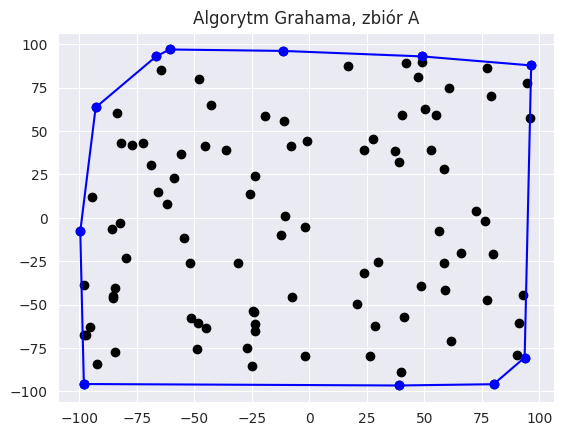

([[-97.92458241957347,
   38.993935435102514,
   80.17953288621723,
   93.64612763610043,
   96.48863113403121,
   49.139505769272716,
   -11.301289562979093,
   -60.66275273983124,
   -66.48514093438217,
   -92.7925006474877,
   -99.4830131991791],
  [-95.70207870541321,
   -96.54242603972398,
   -95.81217720394247,
   -80.45504837336033,
   87.81099606794677,
   92.99617786233165,
   96.16600469068041,
   96.99536881681126,
   93.02946337325335,
   63.61054522181203,
   -7.764575705032371]],
 '0.00231')

In [27]:
graham_algorithm(table_a,final_plot="Algorytm Grahama, zbiór A", save_plots=True, measure_time=True,save_file=True)

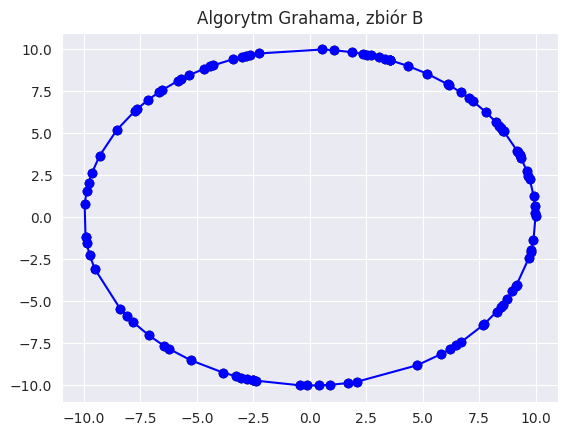

([[-9.928037902640336,
   -9.884372142584631,
   -9.739667586822199,
   -9.517287725158683,
   -8.397551669910264,
   -8.105715485251842,
   -7.820111292129753,
   -7.1317334795091245,
   -6.439756186199963,
   -6.235549054395716,
   -5.26849274499609,
   -3.8375461027847235,
   -3.246280189141168,
   -3.0454977231139964,
   -2.7816863316052647,
   -2.5289845382839378,
   -2.492764731692401,
   -2.390105641550055,
   -0.4382171000029899,
   -0.10820489096197773,
   0.40367637895612707,
   0.903008595962095,
   1.6994805887956623,
   2.0729729142860096,
   4.751274994704451,
   5.80434524949347,
   6.224791883527737,
   6.477690900738647,
   6.693029748227383,
   7.677032025012962,
   7.7092189505266955,
   8.274305985330466,
   8.455366017287503,
   8.543294572467477,
   8.730045111102578,
   8.97672917404395,
   9.125426939044461,
   9.165797540280906,
   9.70277106763255,
   9.7853266885087,
   9.80673560732664,
   9.907334212183406,
   9.99963542001898,
   9.997090170583377,
   9.97

In [28]:
graham_algorithm(table_b,final_plot="Algorytm Grahama, zbiór B", save_plots=True, measure_time=True, save_file=True)

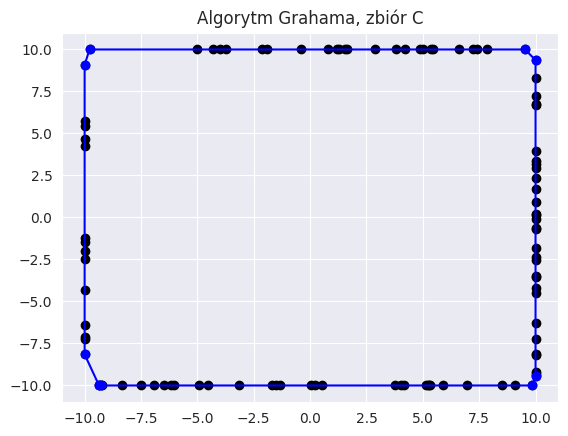

([[-9.36086292089804,
   -9.294017695449003,
   9.848343542087889,
   10.0,
   10.0,
   9.533504705302654,
   -9.783177104803237,
   -10.0,
   -10.0],
  [-10.0,
   -10.0,
   -10.0,
   -9.451690131917427,
   9.365738947500567,
   10.0,
   10.0,
   9.09212040035435,
   -8.148739262850924]],
 '0.00631')

In [29]:
graham_algorithm(table_c,final_plot="Algorytm Grahama, zbiór C", save_plots=True, measure_time=True, save_file=True)

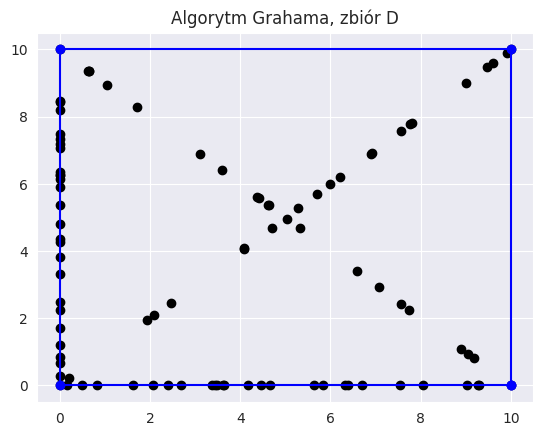

([[10.0, 10.0, 0.0, 0.0], [0.0, 10.0, 10.0, 0.0]], '0.00841')

In [30]:
graham_algorithm(table_d,final_plot="Algorytm Grahama, zbiór D", save_plots=True, measure_time=True, save_file=True)

## Jarvis:

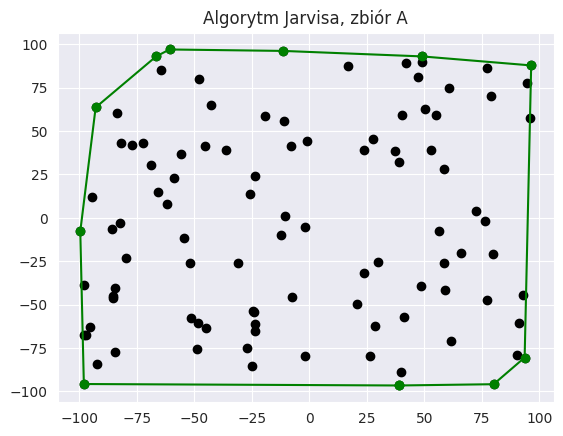

([[38.993935435102514,
   80.17953288621723,
   93.64612763610043,
   96.48863113403121,
   49.139505769272716,
   -11.301289562979093,
   -60.66275273983124,
   -66.48514093438217,
   -92.7925006474877,
   -99.4830131991791,
   -97.92458241957347],
  [-96.54242603972398,
   -95.81217720394247,
   -80.45504837336033,
   87.81099606794677,
   92.99617786233165,
   96.16600469068041,
   96.99536881681126,
   93.02946337325335,
   63.61054522181203,
   -7.764575705032371,
   -95.70207870541321]],
 '0.00295')

In [31]:
jarvis_algorithm(table_a,final_plot="Algorytm Jarvisa, zbiór A", save_plots=True, measure_time=True, save_file=True)

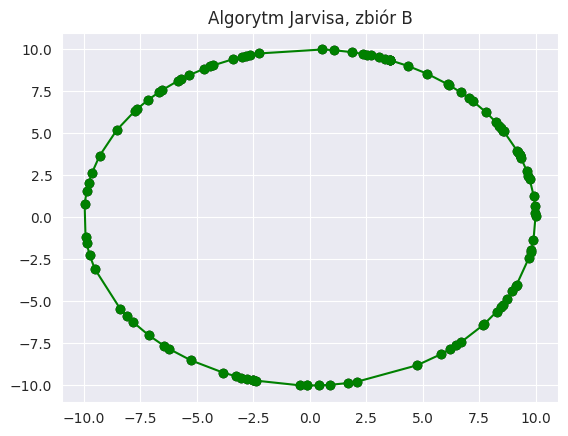

([[-0.10820489096197773,
   0.40367637895612707,
   0.903008595962095,
   1.6994805887956623,
   2.0729729142860096,
   4.751274994704451,
   5.80434524949347,
   6.224791883527737,
   6.477690900738647,
   6.693029748227383,
   7.677032025012962,
   7.7092189505266955,
   8.274305985330466,
   8.455366017287503,
   8.543294572467477,
   8.730045111102578,
   8.97672917404395,
   9.125426939044461,
   9.165797540280906,
   9.70277106763255,
   9.7853266885087,
   9.80673560732664,
   9.907334212183406,
   9.99963542001898,
   9.997090170583377,
   9.977489755429879,
   9.921791888021465,
   9.739514069499325,
   9.687089307693203,
   9.605246775577944,
   9.347105226443823,
   9.291273585315796,
   9.290856488225842,
   9.20859585428397,
   9.178531843561748,
   8.589162024673024,
   8.578878740042073,
   8.47281424497629,
   8.39038933973607,
   8.237372513556657,
   7.817362723736957,
   7.212739564002437,
   7.049280023076002,
   6.684134522490021,
   6.170815258236858,
   6.1103270

In [32]:
jarvis_algorithm(table_b,final_plot="Algorytm Jarvisa, zbiór B", save_plots=True, measure_time=True, save_file=True)

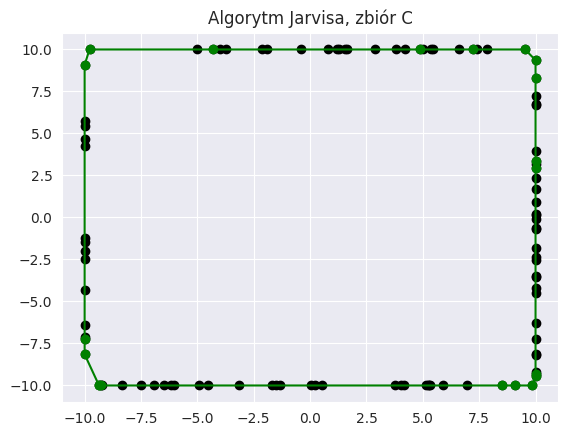

([[-9.36086292089804,
   -9.294017695449003,
   8.51945805585897,
   9.079204066256008,
   9.848343542087889,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   9.533504705302654,
   7.206387803623386,
   4.894158067199051,
   -4.3132097813324926,
   -9.783177104803237,
   -10.0,
   -10.0,
   -10.0],
  [-10.0,
   -10.0,
   -10.0,
   -10.0,
   -10.0,
   -9.451690131917427,
   -9.297673714635549,
   2.970045007534152,
   3.383664740546772,
   8.328099859592488,
   9.365738947500567,
   10.0,
   10.0,
   10.0,
   10.0,
   10.0,
   9.09212040035435,
   -7.224990394475594,
   -8.148739262850924]],
 '0.00577')

In [33]:
jarvis_algorithm(table_c,final_plot="Algorytm Jarvisa, zbiór C", save_plots=True, measure_time=True, save_file=True)

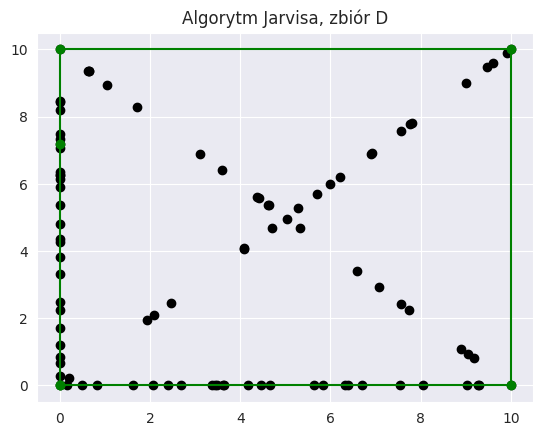

([[0.0, 10.0, 10.0, 0.0, 0.0], [0.0, 0.0, 10.0, 10.0, 7.184656712303204]],
 '0.00504')

In [34]:
jarvis_algorithm(table_d,final_plot="Algorytm Jarvisa, zbiór D", save_plots=True, measure_time=True, save_file=True)

# Wizualizacja algorytmu dla pomniejszonych zbiorów A,B,C,D

### Pomniejszony zbiór A

In [41]:
dataA=setA(30,-10,10)

### Pomniejszony zbiór B

In [53]:
dataB=setB(30,(10,10),5)

### Pomniejszony zbiór C

In [37]:
dataC=setC(20,(-15,-10),(5,5))

### Pomniejszony zbiór D

In [38]:
dataD=setD((15,15),10,10)

# Wizualizacja działania algorytmu Grahama:

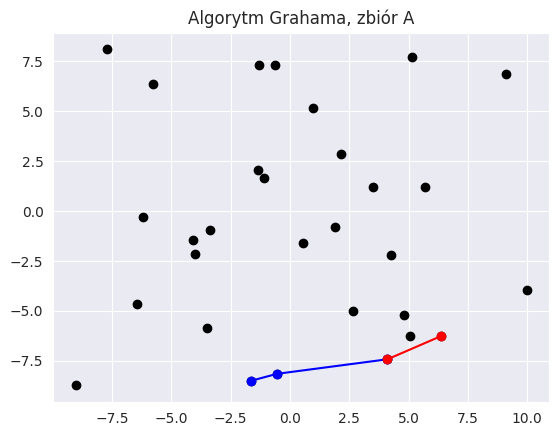

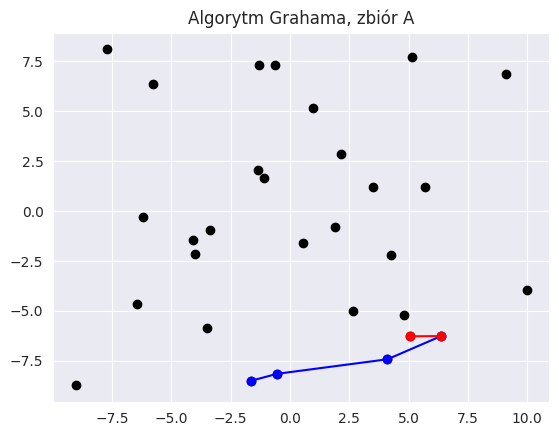

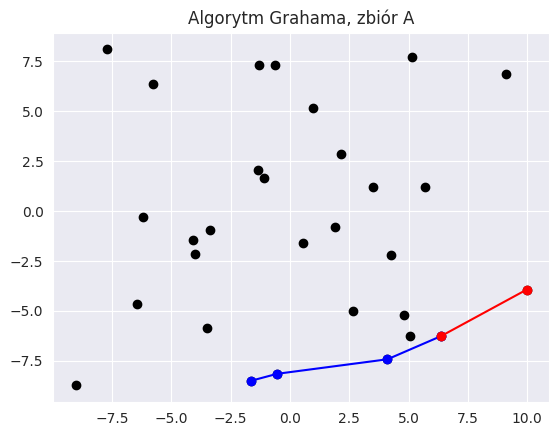

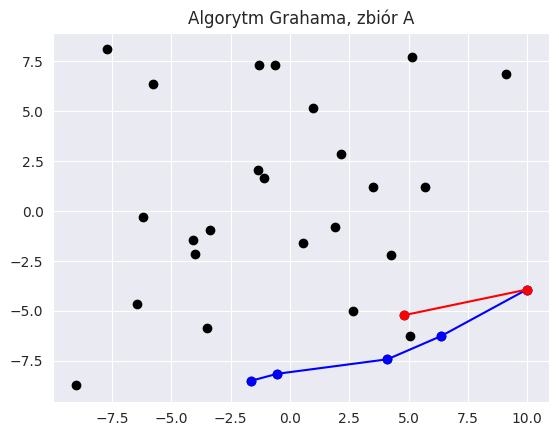

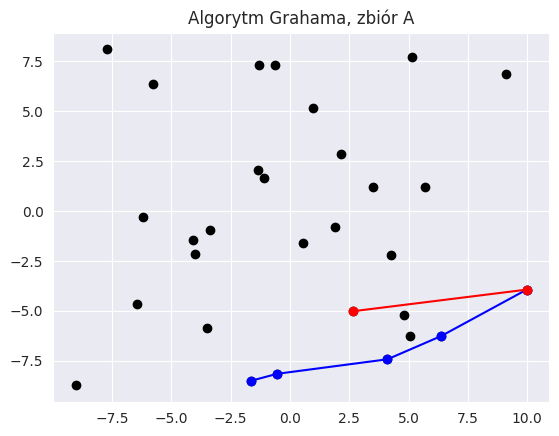

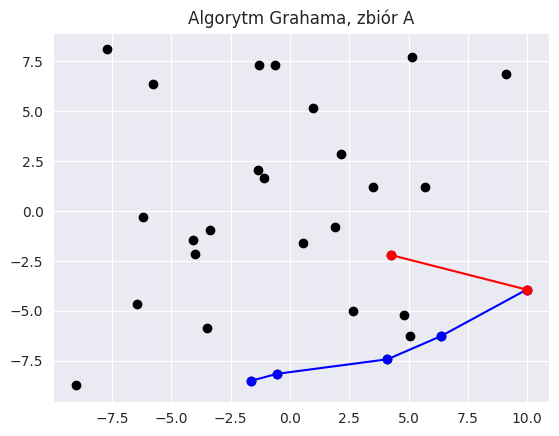

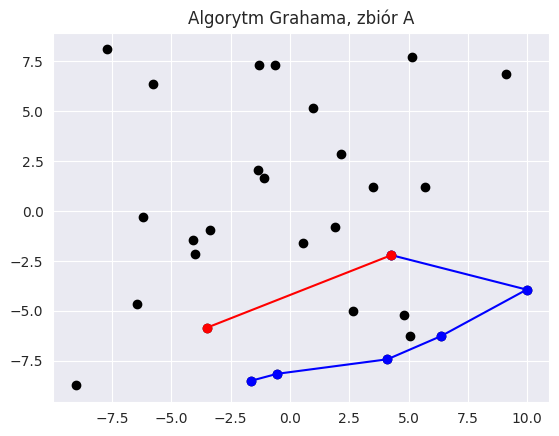

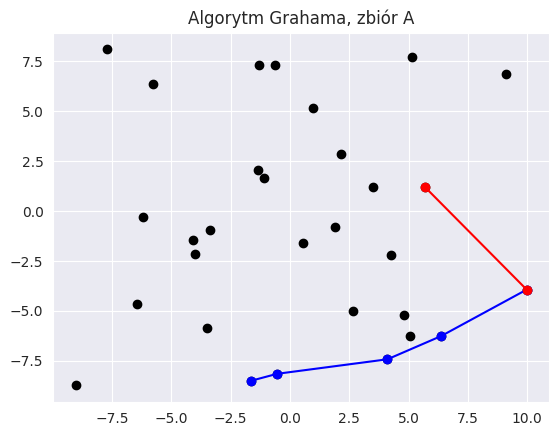

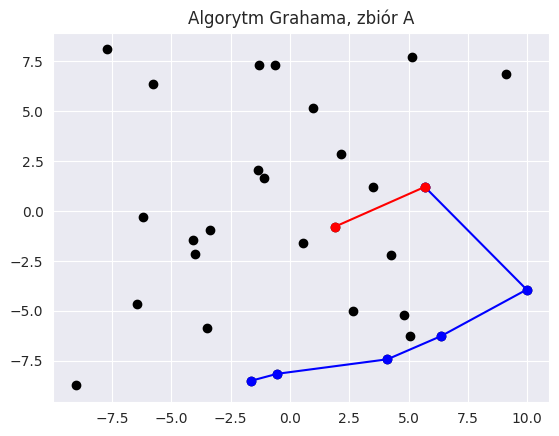

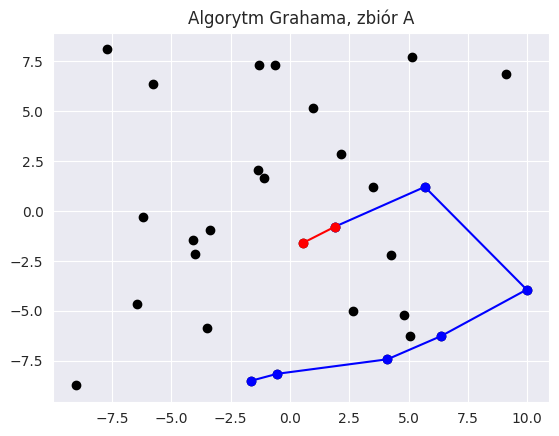

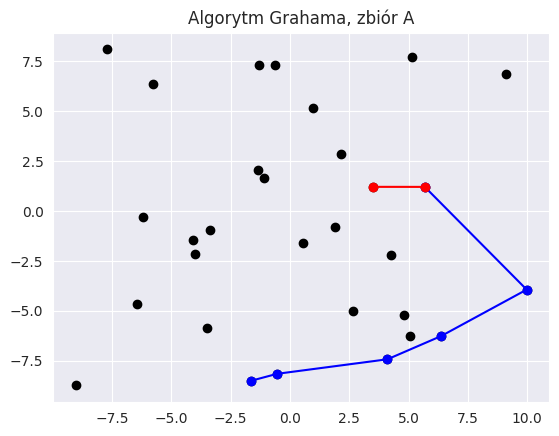

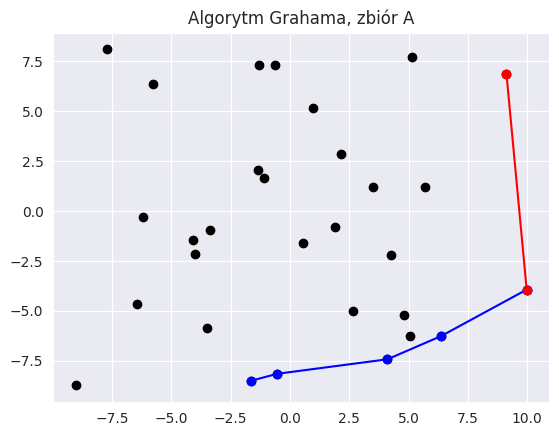

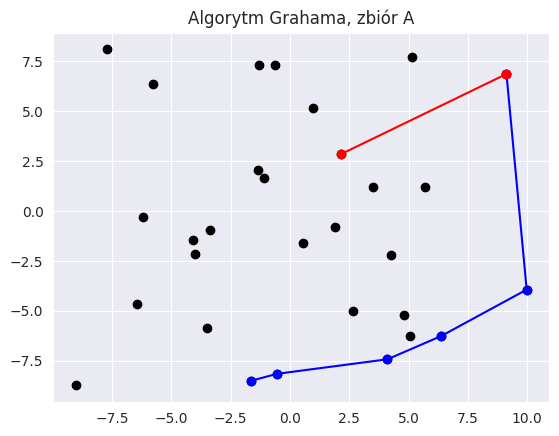

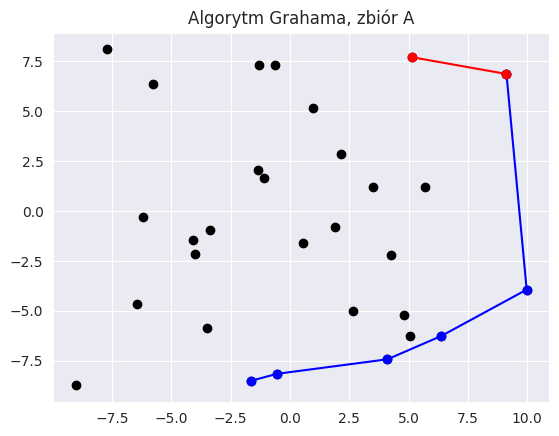

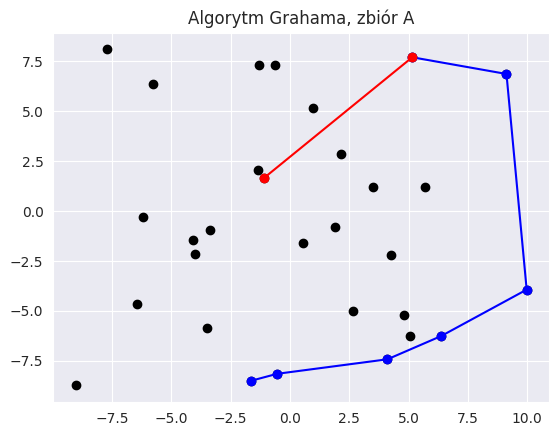

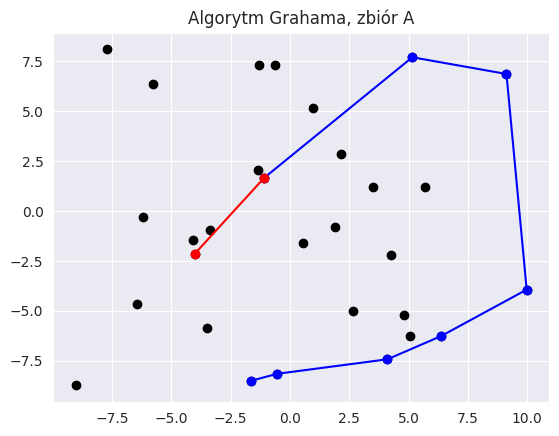

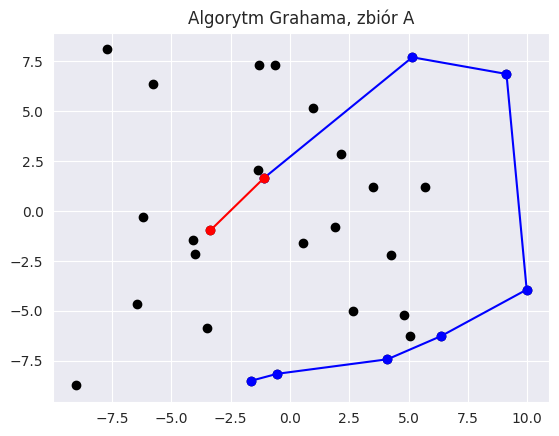

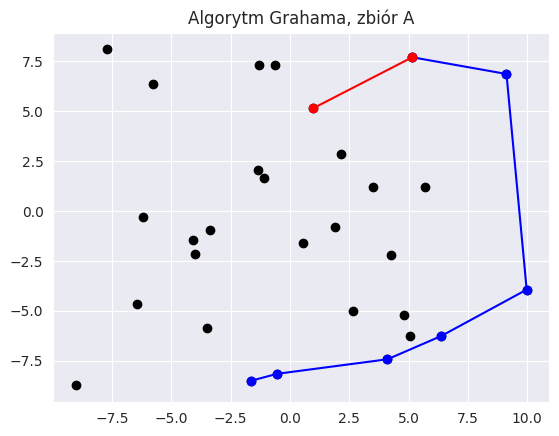

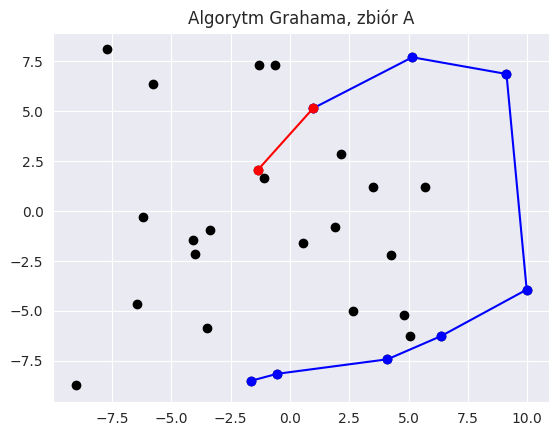

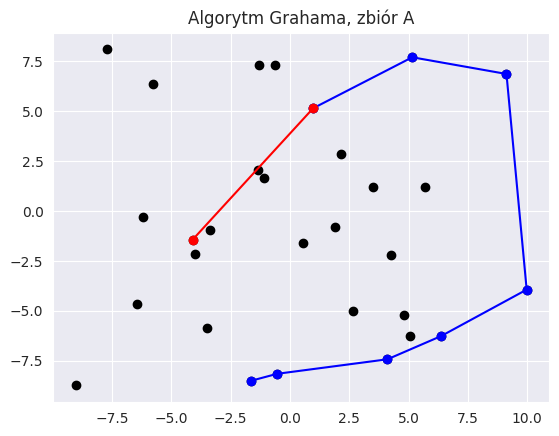

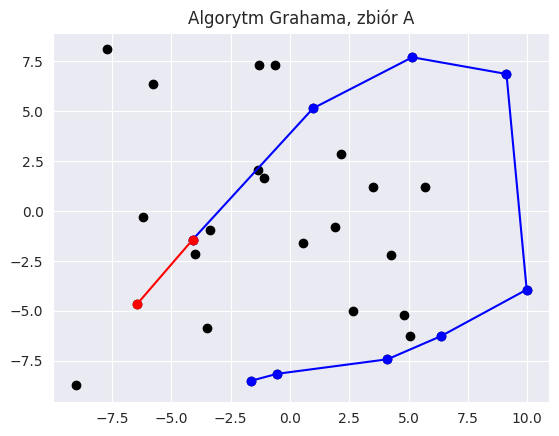

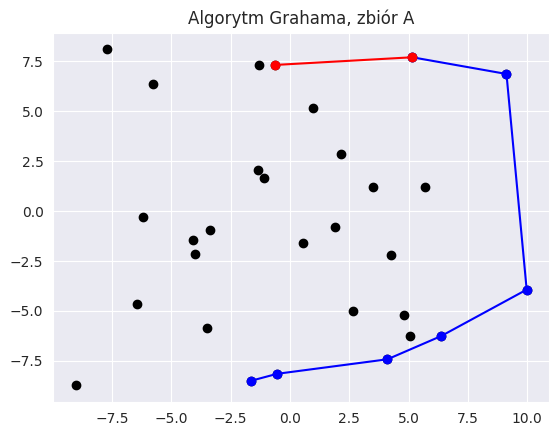

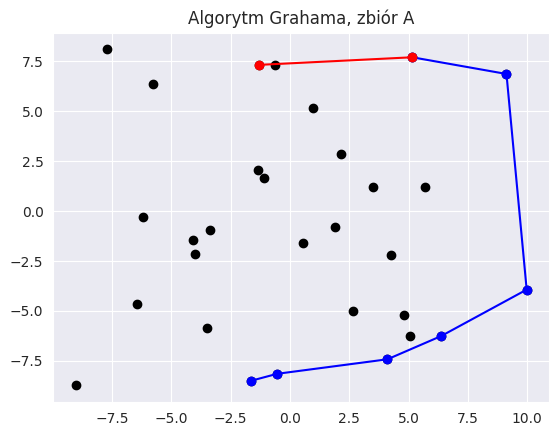

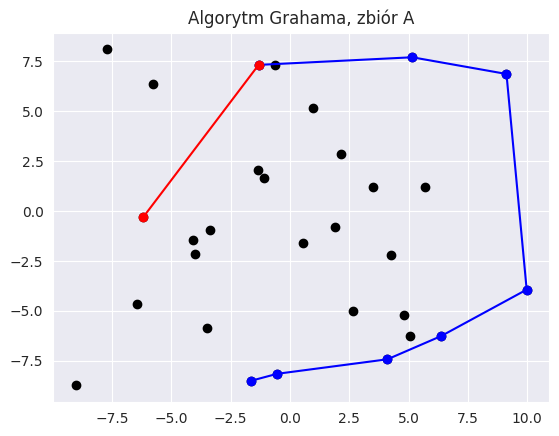

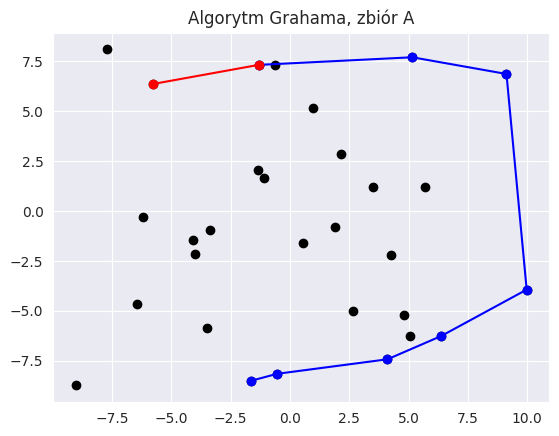

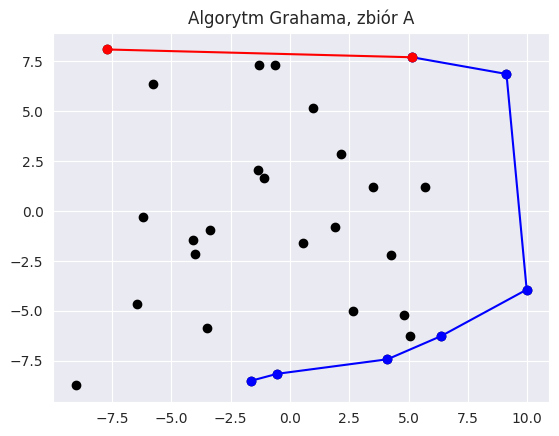

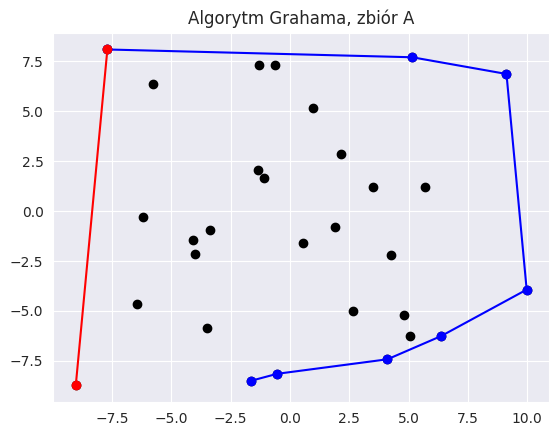

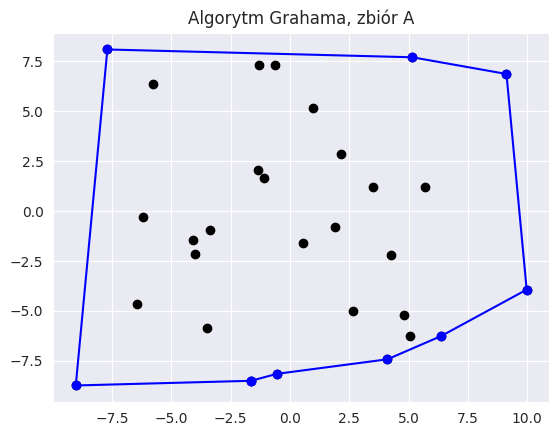

[[-1.643446491192206,
  -0.5414163792362618,
  4.107851332137294,
  6.367631889887001,
  9.975703796677607,
  9.1242898321605,
  5.153759862695882,
  -7.696756769570765,
  -9.028602640669543],
 [-8.508159431445907,
  -8.15798828880688,
  -7.430313684889825,
  -6.267849843514743,
  -3.938547910544921,
  6.8684983358951435,
  7.705831299462361,
  8.096328866662134,
  -8.742954282468705]]

In [42]:
graham_algorithm(dataA, show_steps=True, final_plot="Algorytm Grahama, zbiór A")

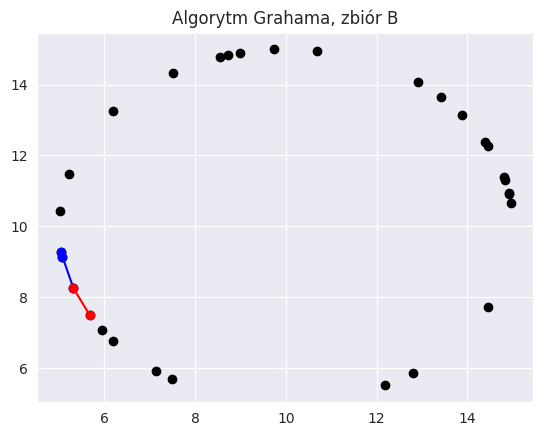

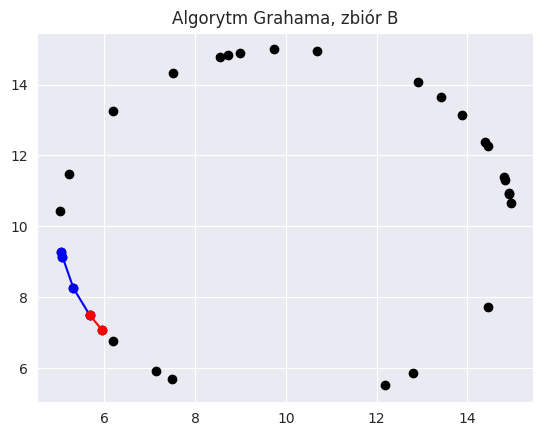

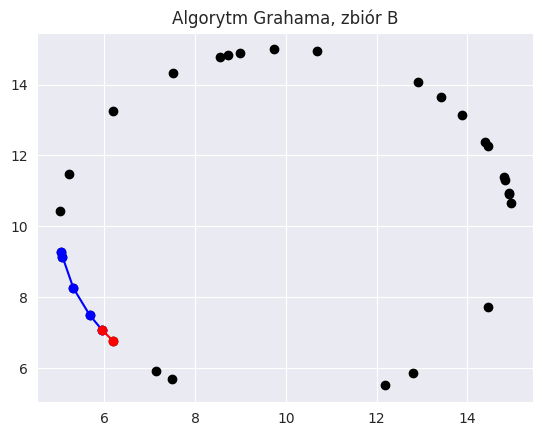

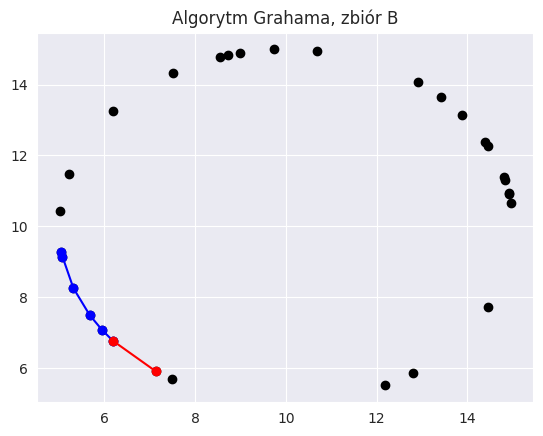

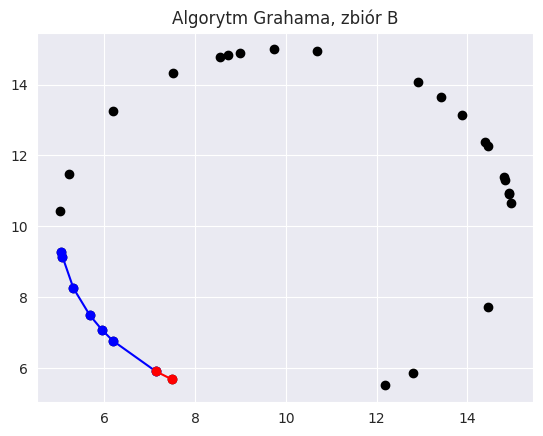

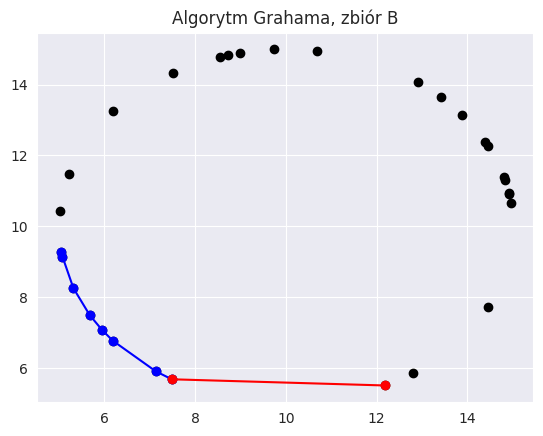

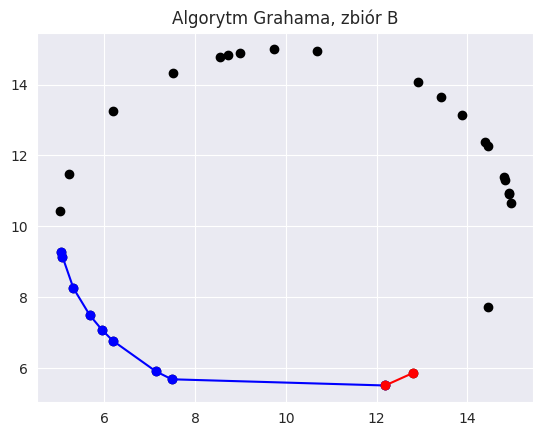

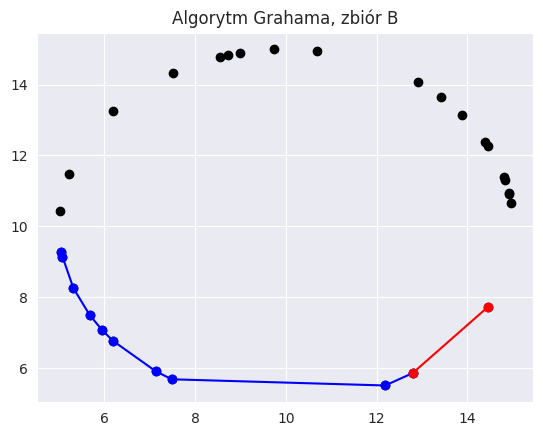

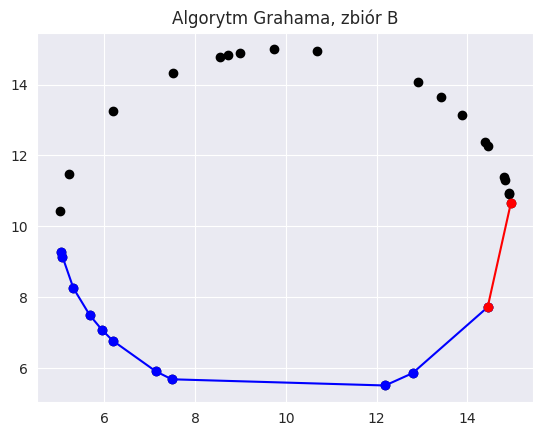

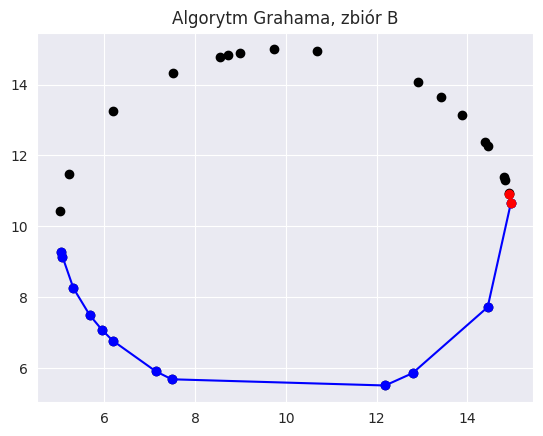

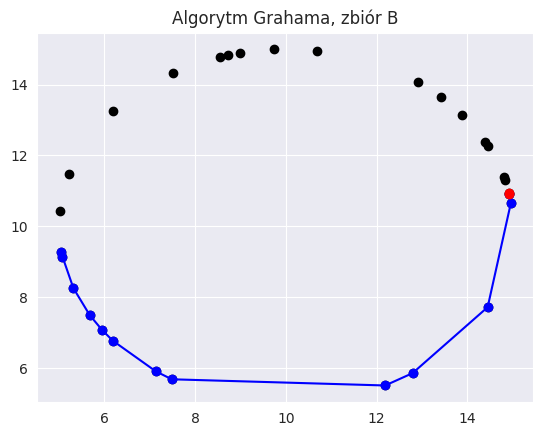

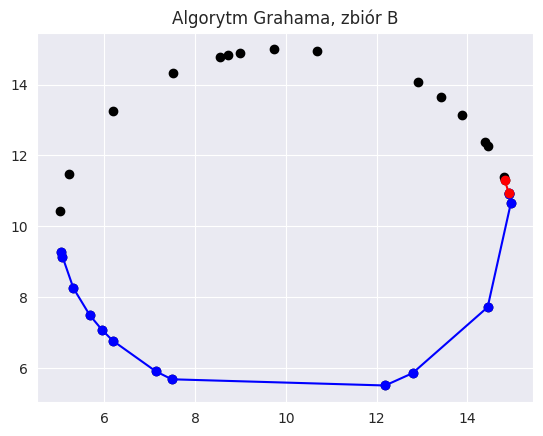

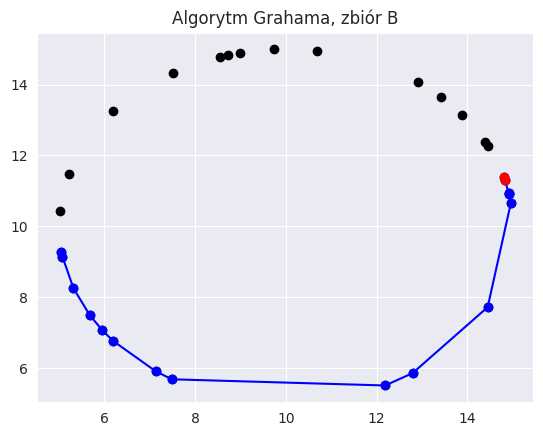

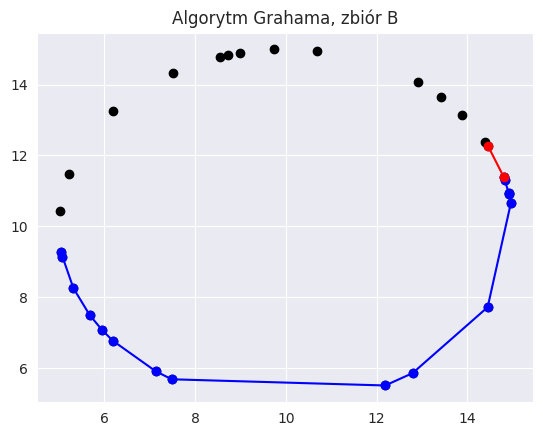

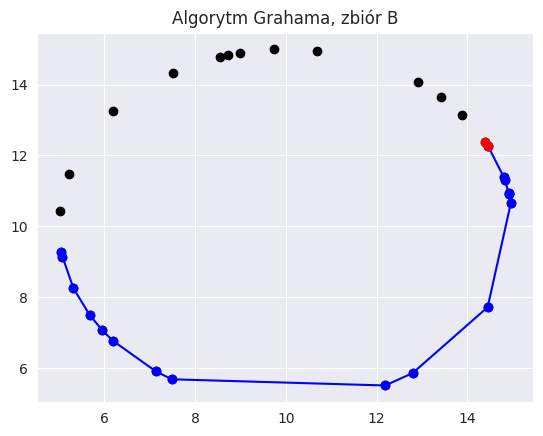

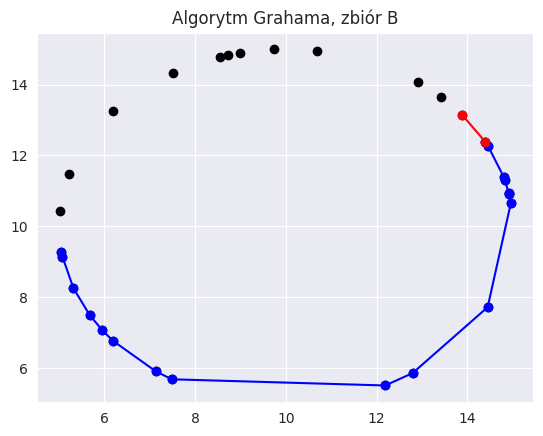

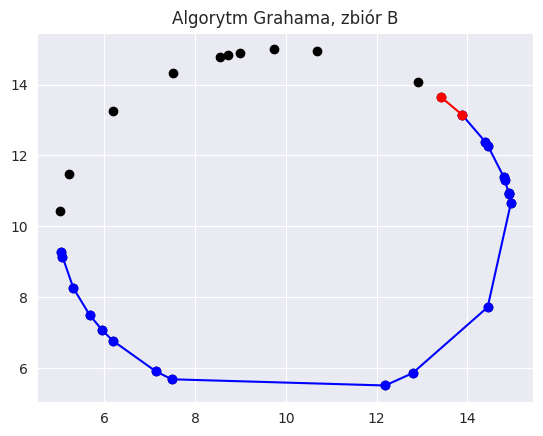

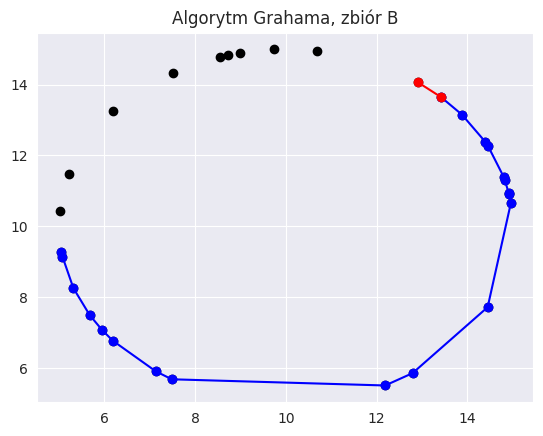

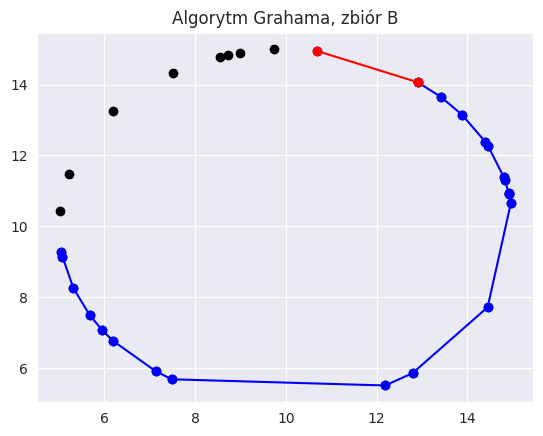

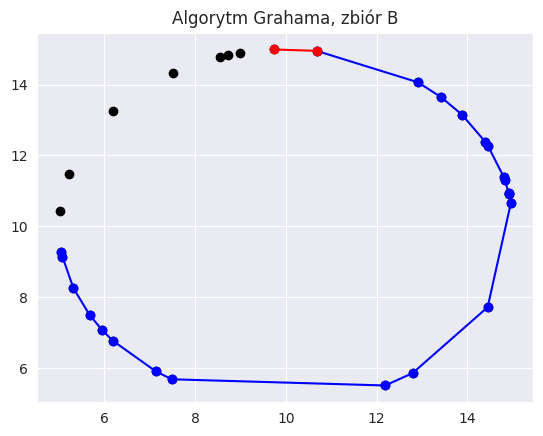

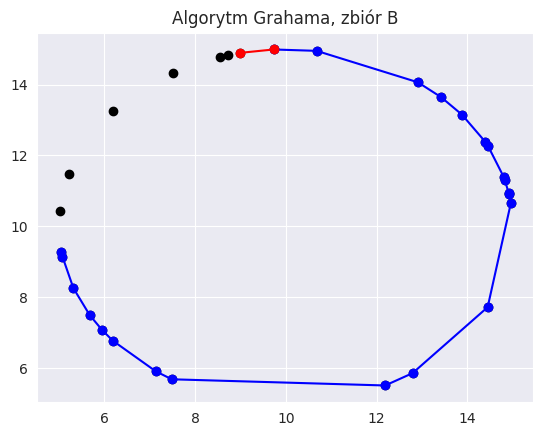

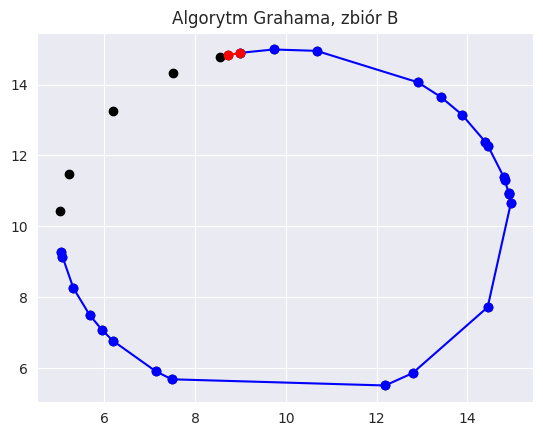

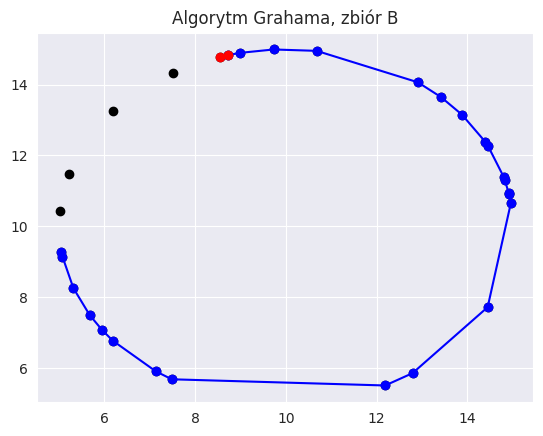

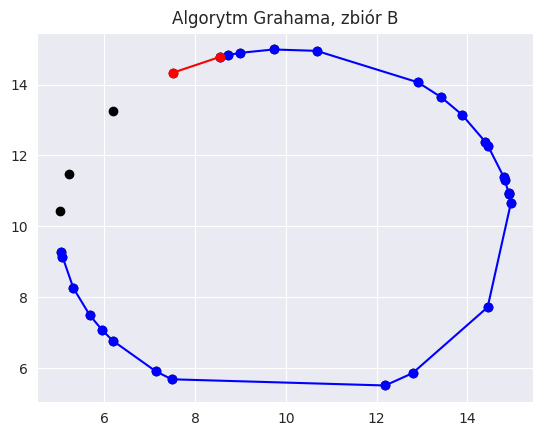

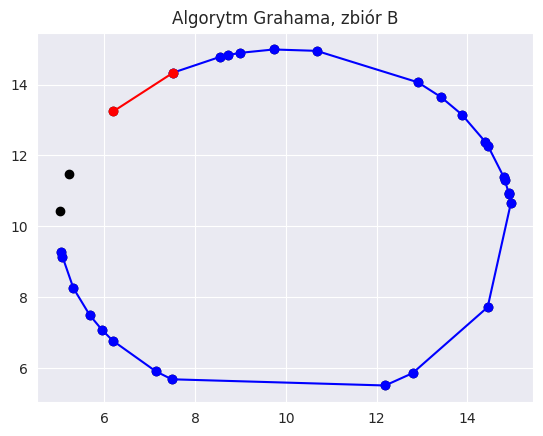

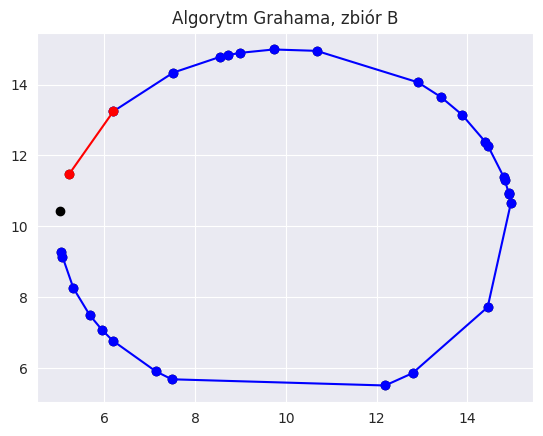

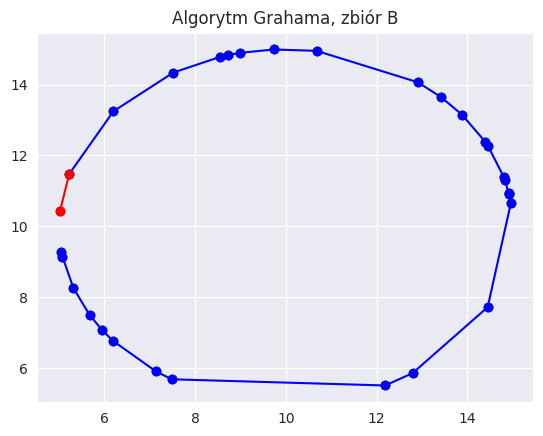

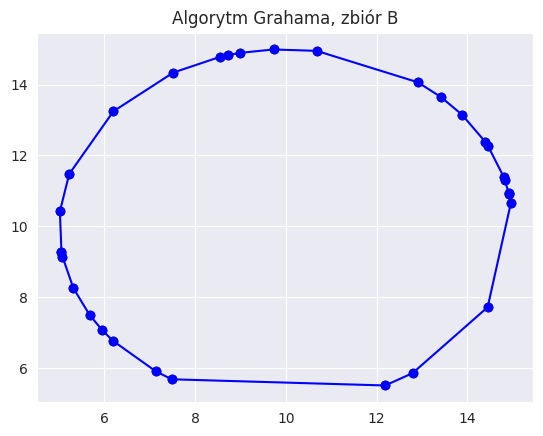

[[5.051823575594056,
  5.073880771286255,
  5.315478365063264,
  5.6767517245895,
  5.951406775963833,
  6.185508962065107,
  7.129929034954315,
  7.483866835202388,
  12.188419451700288,
  12.79178306082858,
  14.447413705537159,
  14.957868259280339,
  14.915681444420914,
  14.911467537118067,
  14.825265166905119,
  14.802770405657721,
  14.453246301734048,
  14.390878599434323,
  13.880396044448974,
  13.420685224038163,
  12.910557737741843,
  10.677100308489804,
  9.728819168430716,
  8.992648751204179,
  8.721406859039352,
  8.556491314252046,
  7.5166617647259875,
  6.197426161040381,
  5.2224018536107035,
  5.017593110193947],
 [9.281981843576915,
  9.143641812968022,
  8.252070638781518,
  7.488123341172951,
  7.065908504104135,
  6.767406904431926,
  5.905773253030344,
  5.679227627263205,
  5.504355407350375,
  5.851994775645696,
  7.715156169056573,
  10.647720868600462,
  10.914371881116168,
  10.936742564334184,
  11.310273280293888,
  11.390466263718166,
  12.2734549426

In [54]:
graham_algorithm(dataB, show_steps=True, final_plot="Algorytm Grahama, zbiór B")

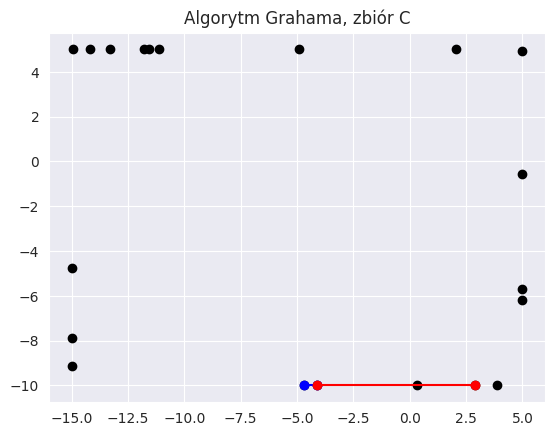

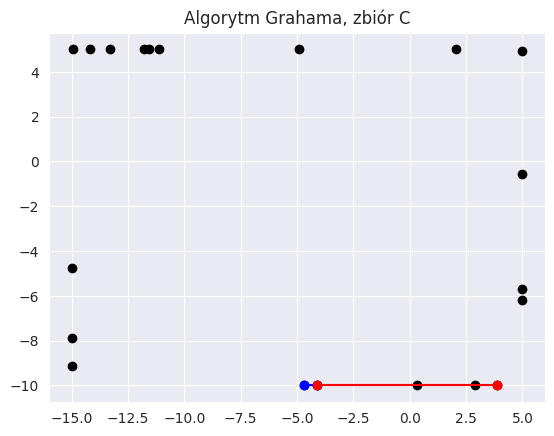

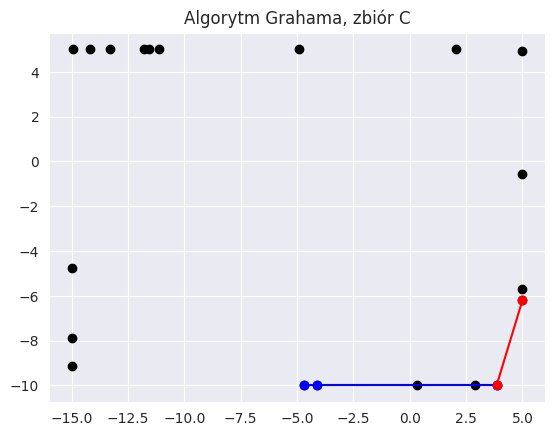

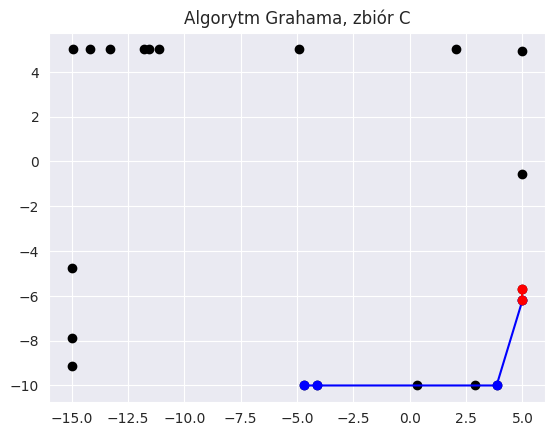

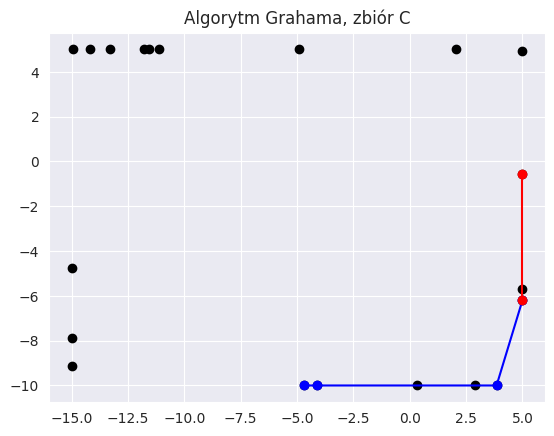

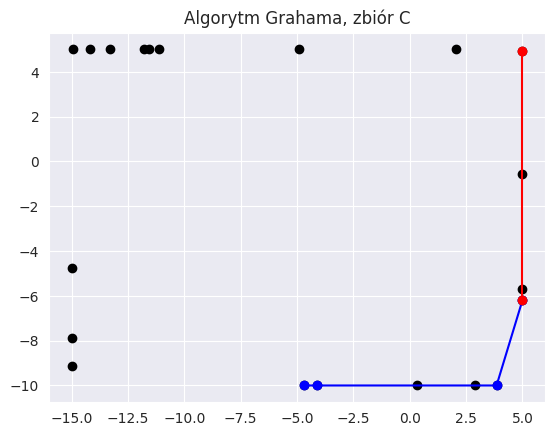

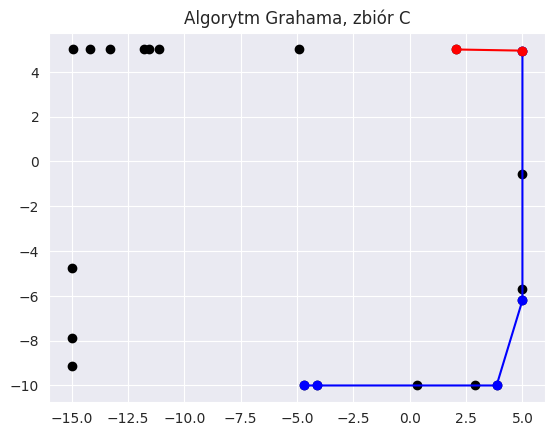

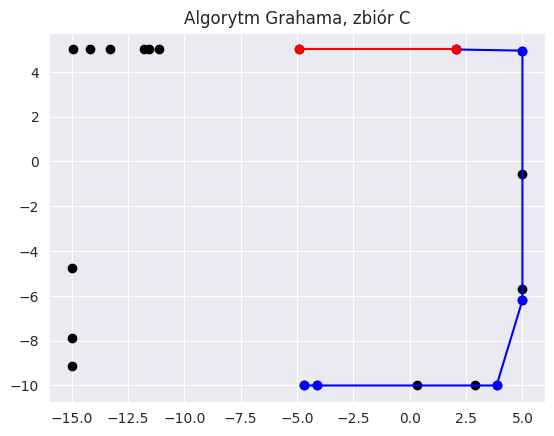

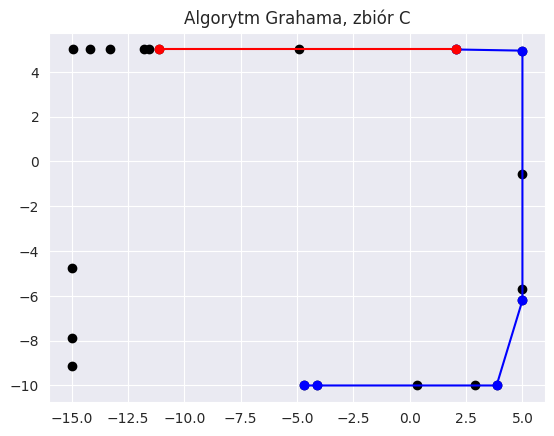

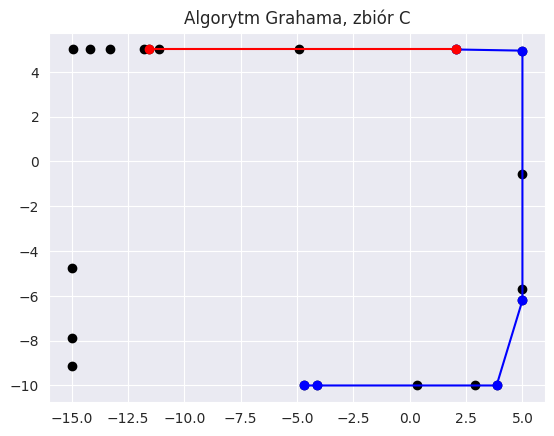

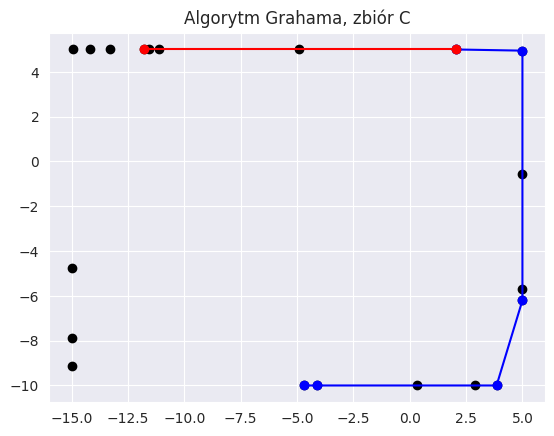

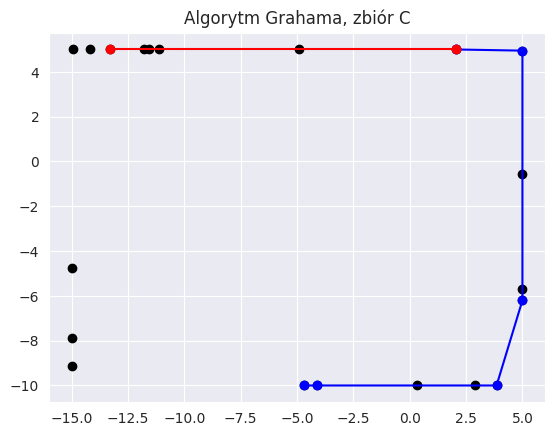

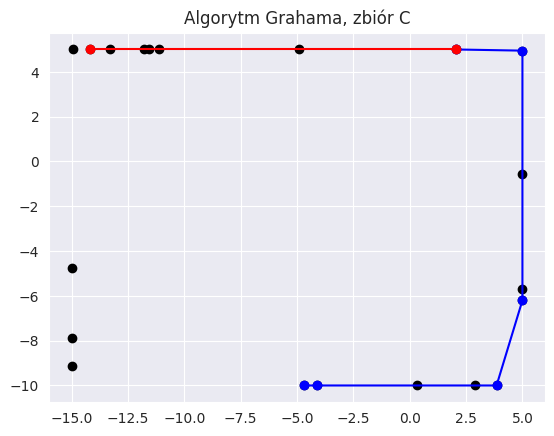

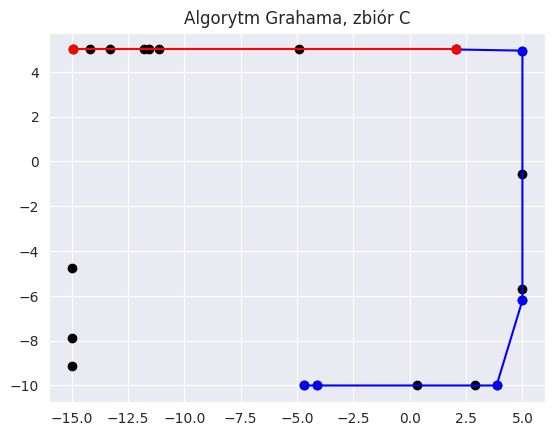

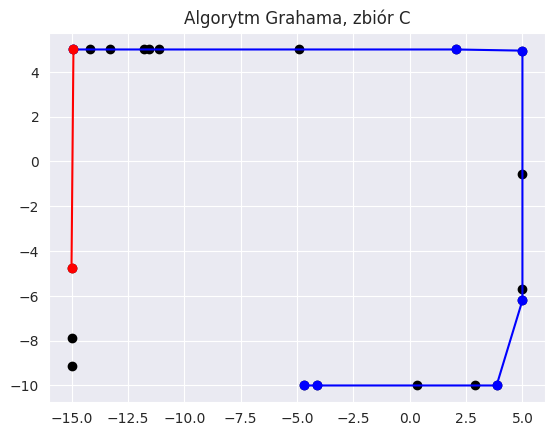

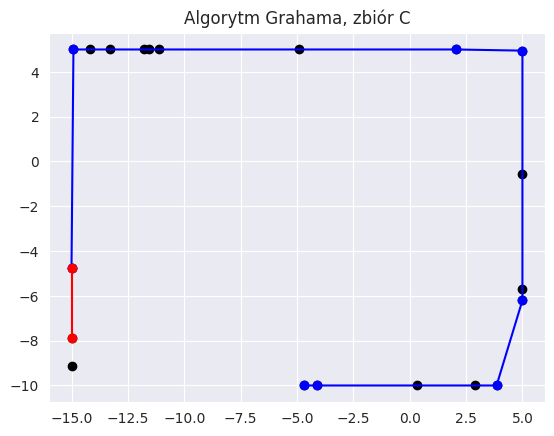

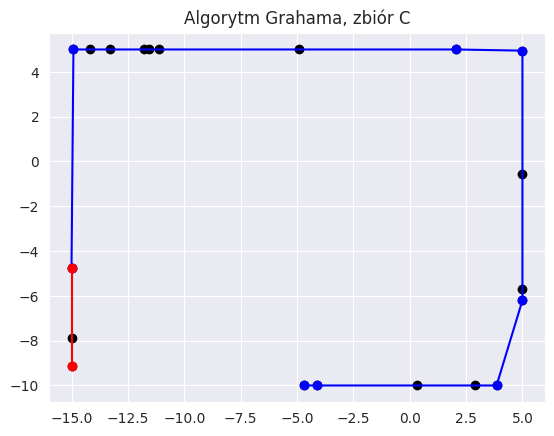

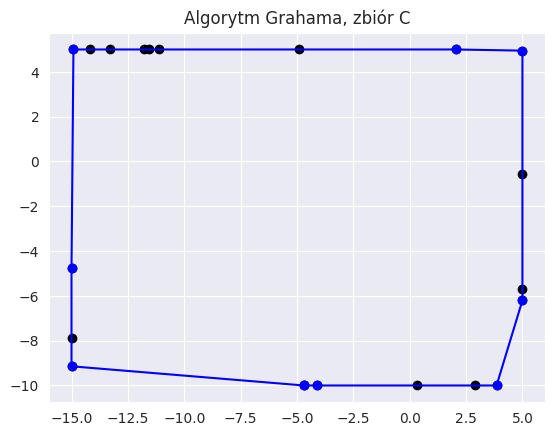

[[-4.692843395151478,
  -4.127297768379012,
  3.853125517591536,
  5.0,
  5.0,
  2.0642606713379834,
  -14.915020911104982,
  -15.0,
  -15.0],
 [-10.0,
  -10.0,
  -10.0,
  -6.199615152181368,
  4.948232511347351,
  5.0,
  5.0,
  -4.775019794173631,
  -9.143593159015927]]

In [44]:
graham_algorithm(dataC, show_steps=True, final_plot="Algorytm Grahama, zbiór C")

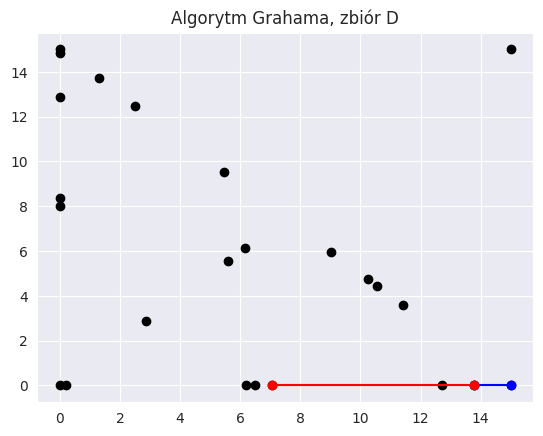

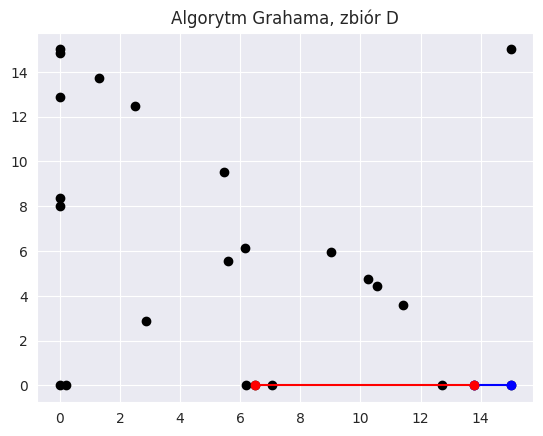

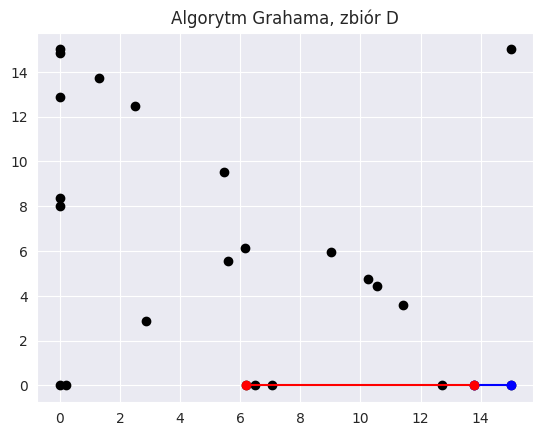

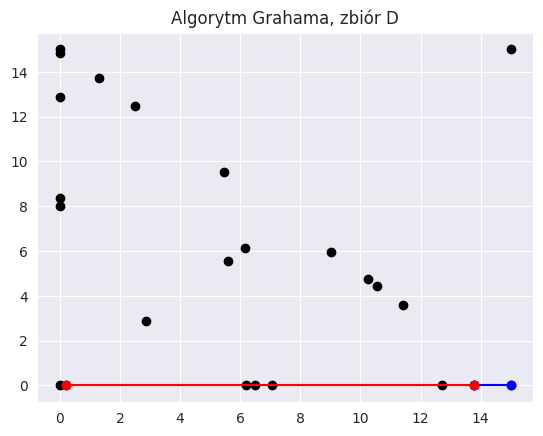

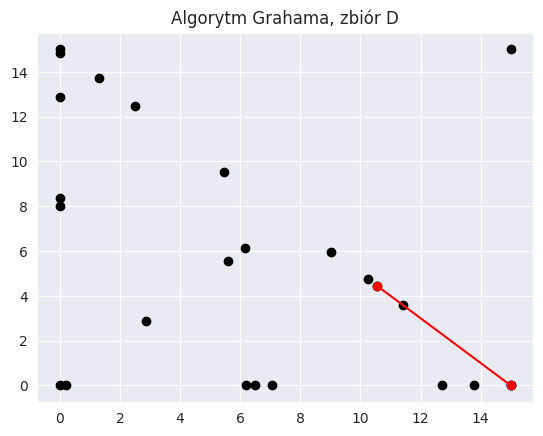

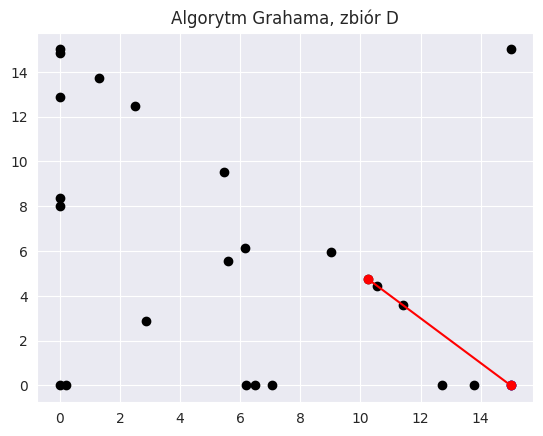

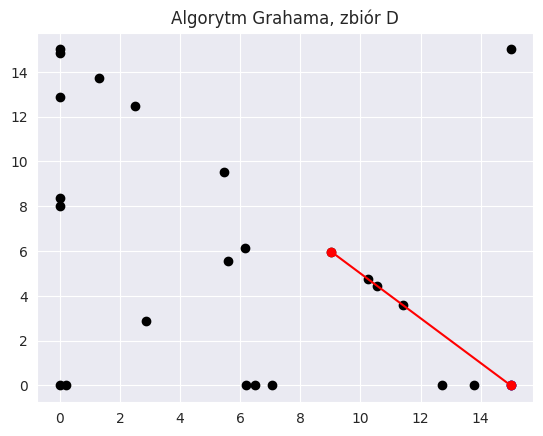

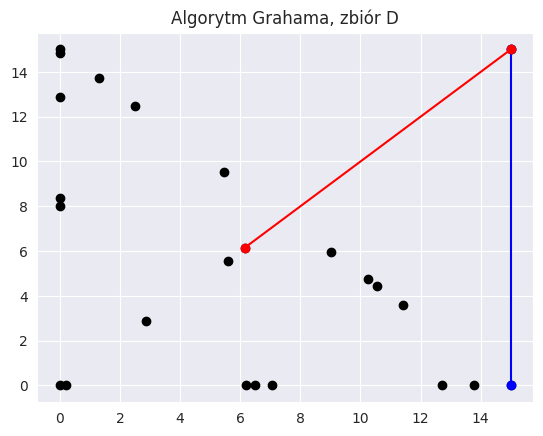

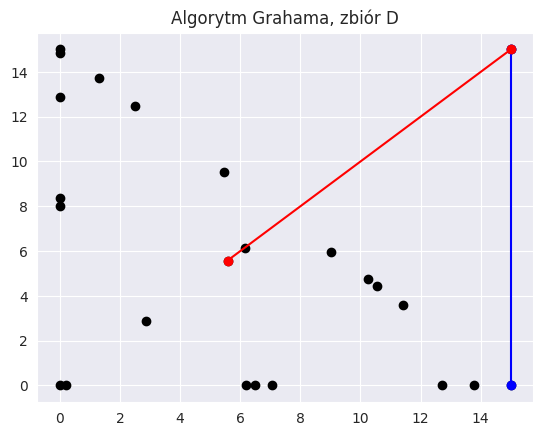

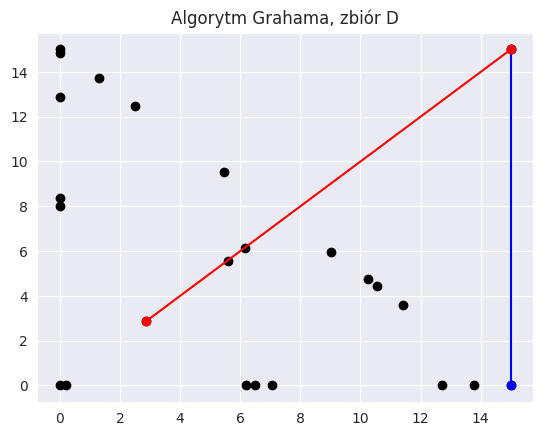

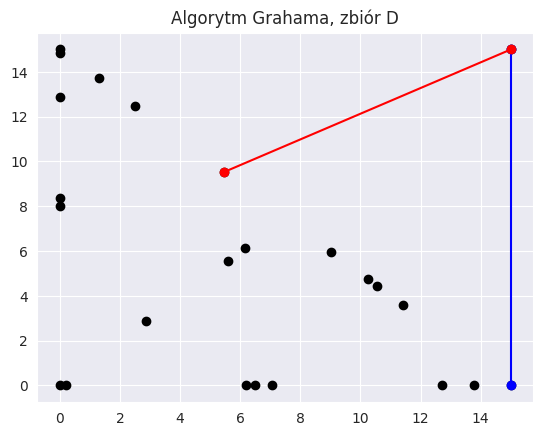

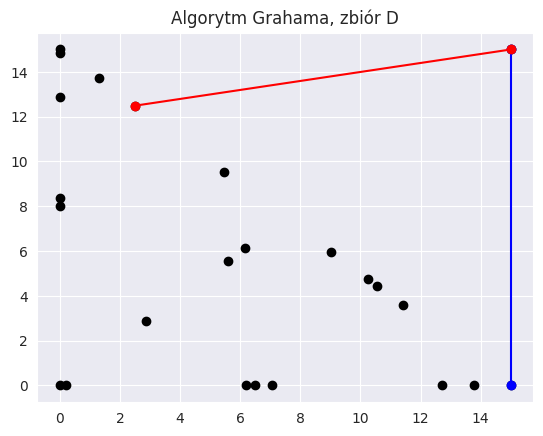

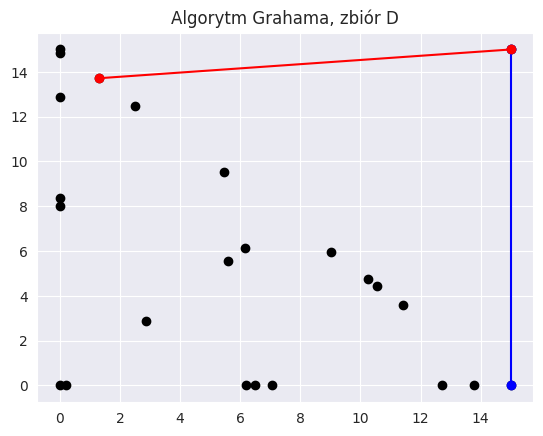

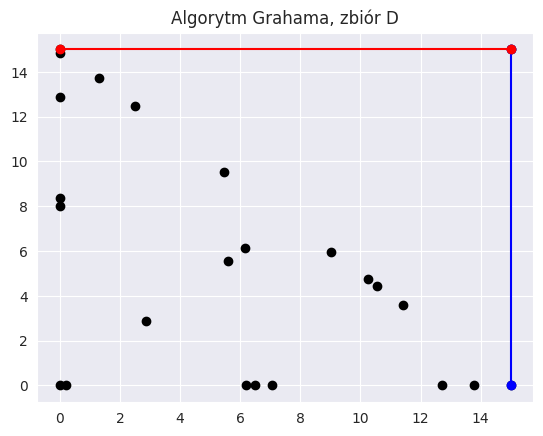

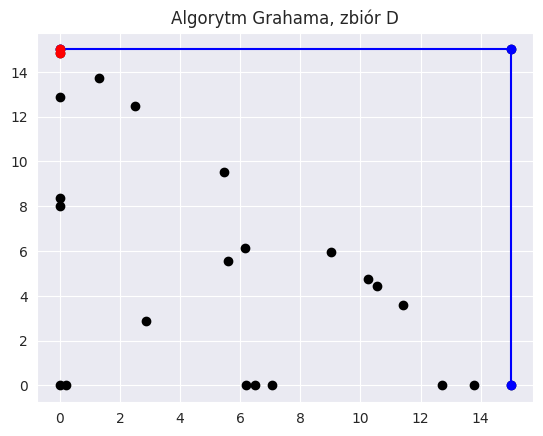

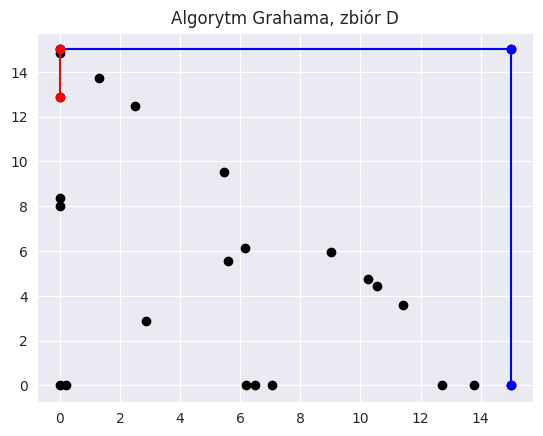

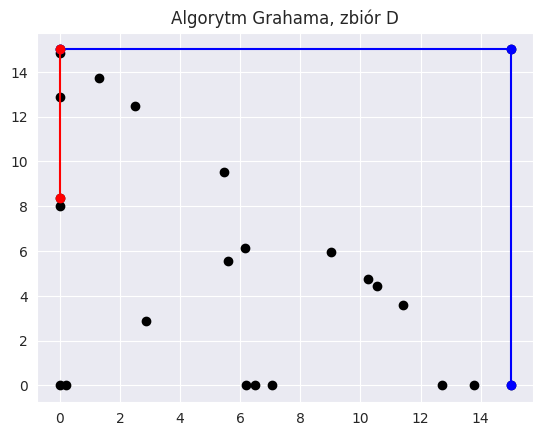

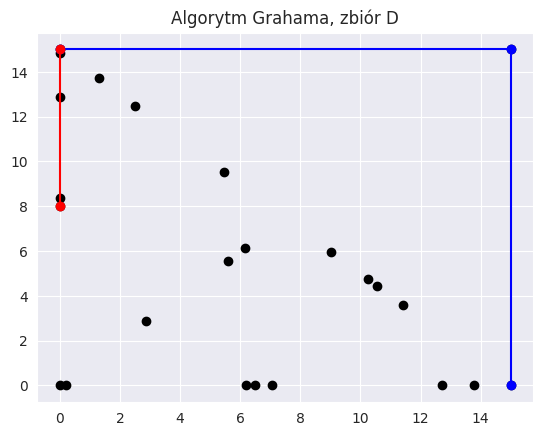

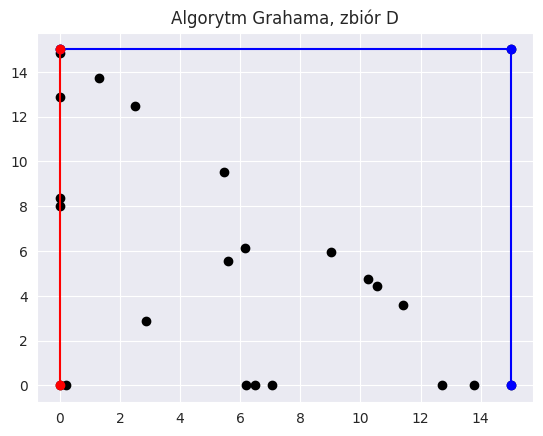

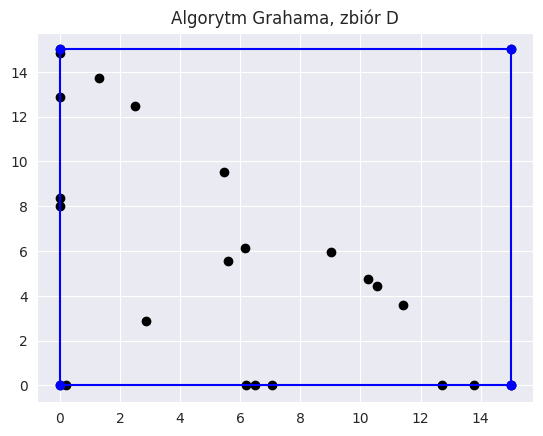

[[15.0, 15.0, 0.0, 0.0], [0.0, 15.0, 15.0, 0.0]]

In [45]:
graham_algorithm(dataD, show_steps=True, final_plot="Algorytm Grahama, zbiór D")

# Wizualizacja działania algorytmu Jarvisa

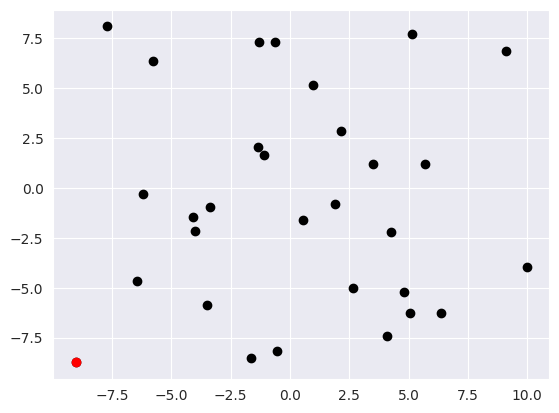

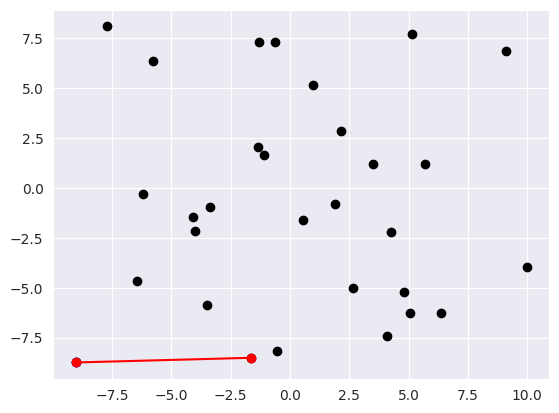

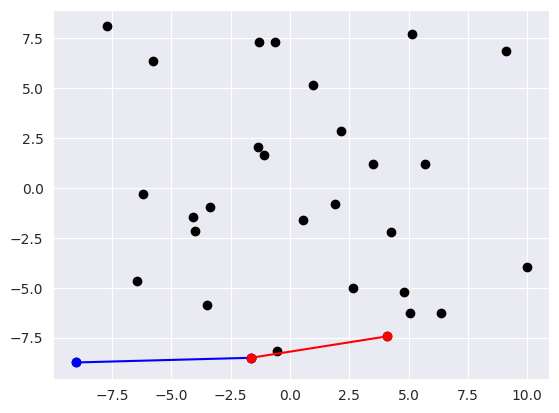

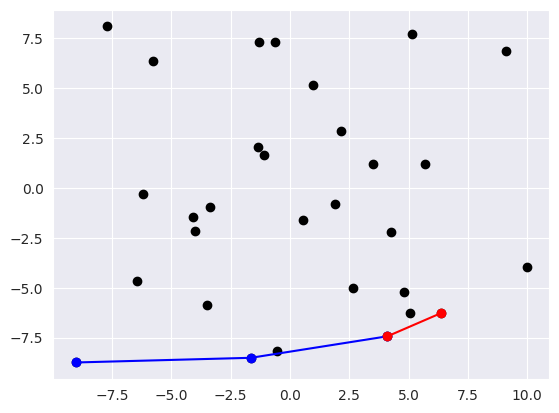

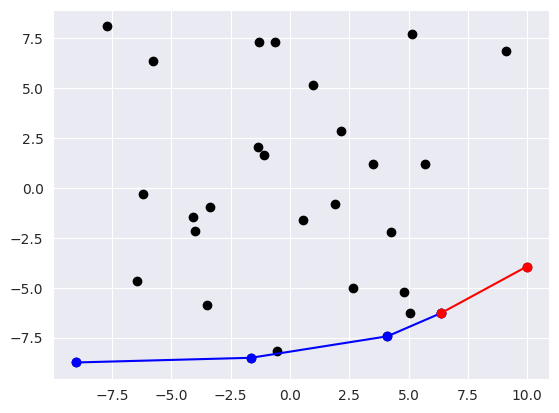

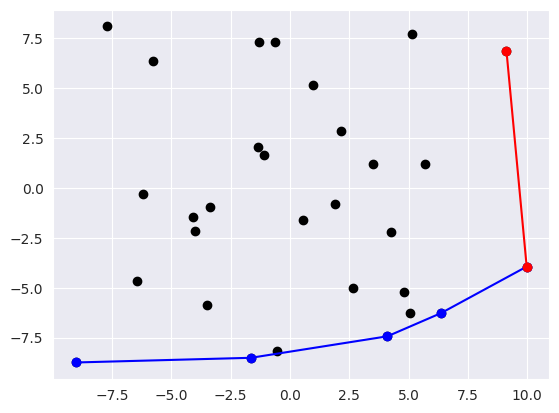

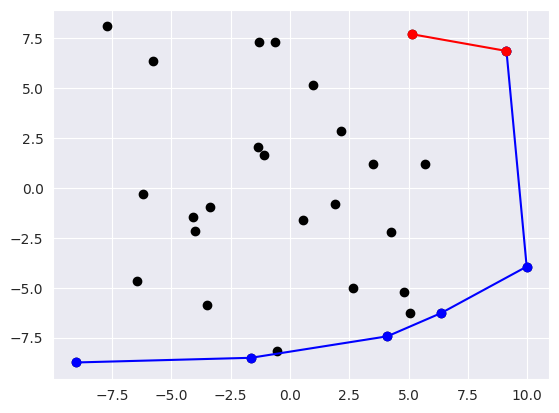

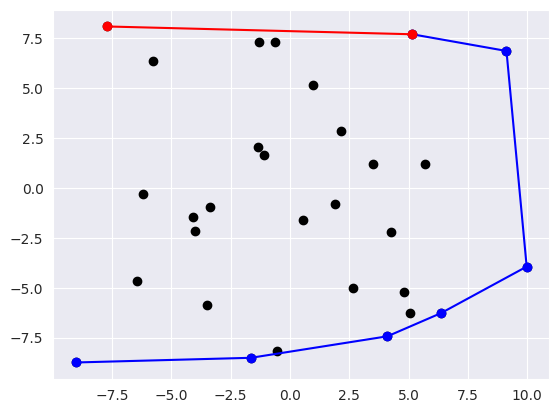

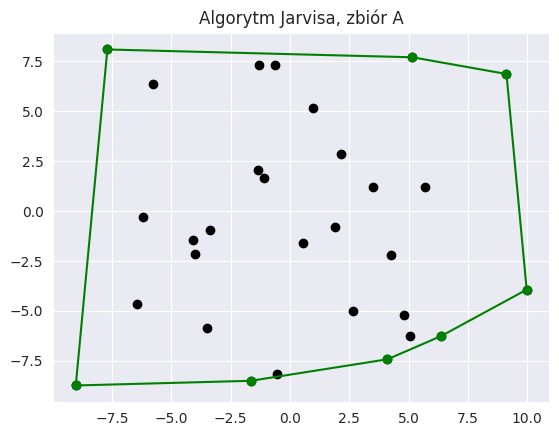

[[-9.028602640669543,
  -1.643446491192206,
  4.107851332137294,
  6.367631889887001,
  9.975703796677607,
  9.1242898321605,
  5.153759862695882,
  -7.696756769570765],
 [-8.742954282468705,
  -8.508159431445907,
  -7.430313684889825,
  -6.267849843514743,
  -3.938547910544921,
  6.8684983358951435,
  7.705831299462361,
  8.096328866662134]]

In [46]:
jarvis_algorithm(dataA, show_steps=True, final_plot="Algorytm Jarvisa, zbiór A")

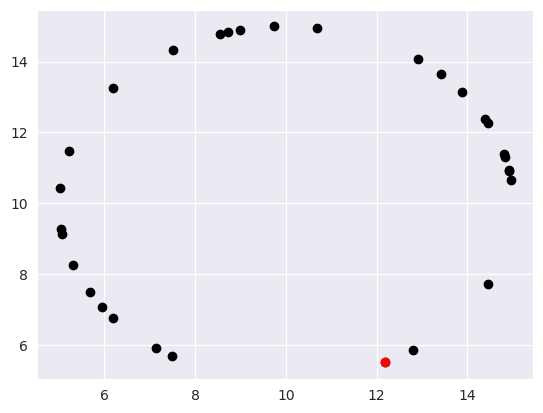

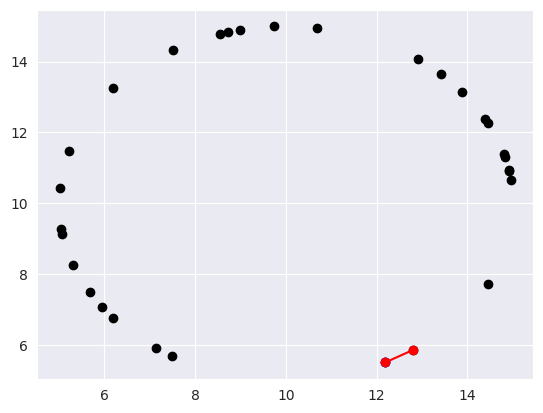

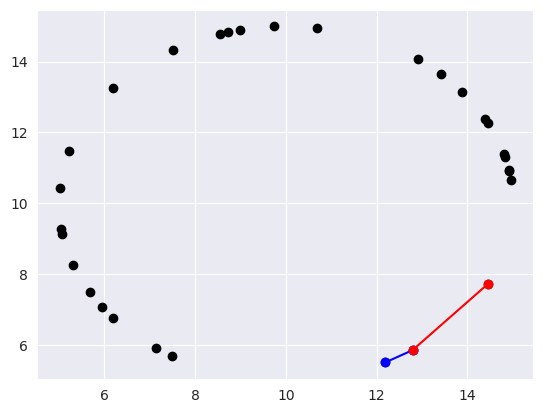

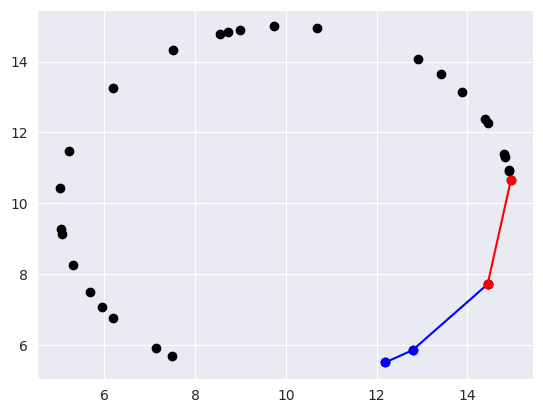

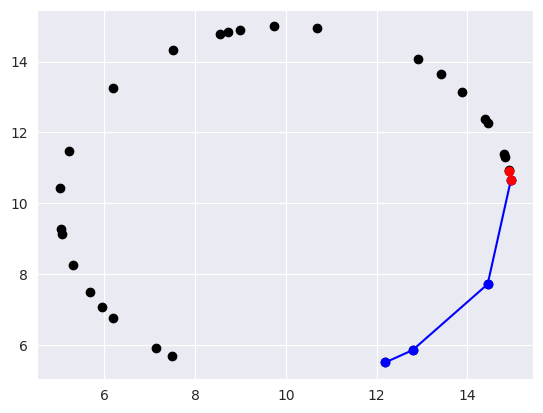

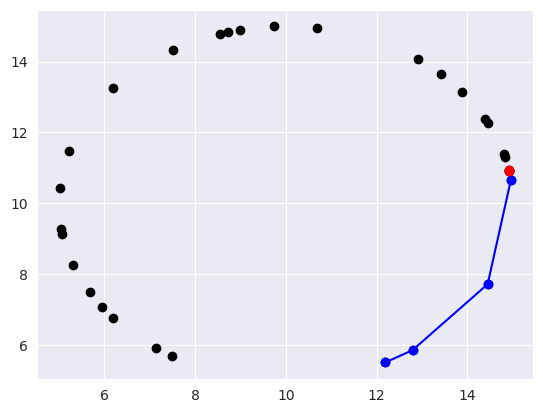

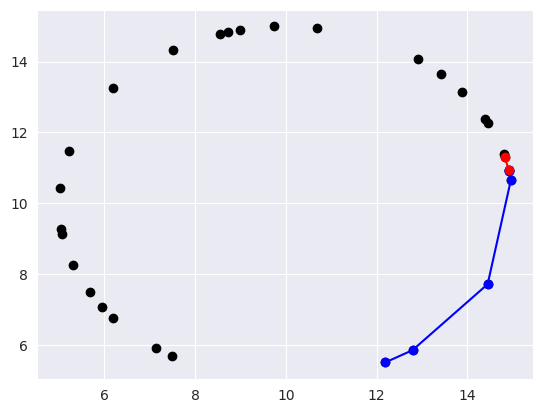

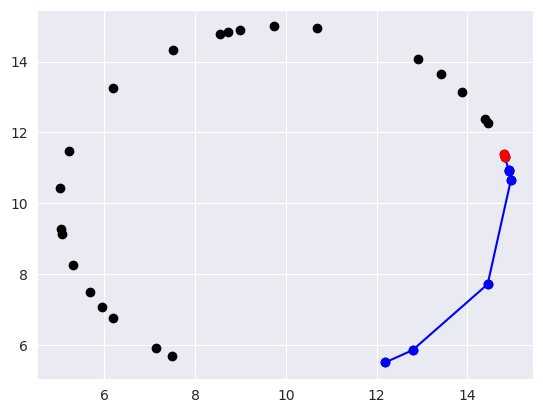

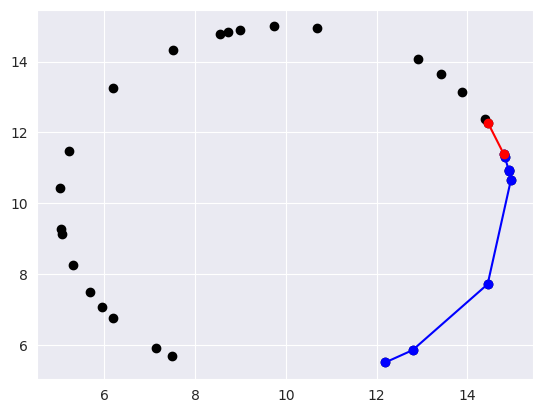

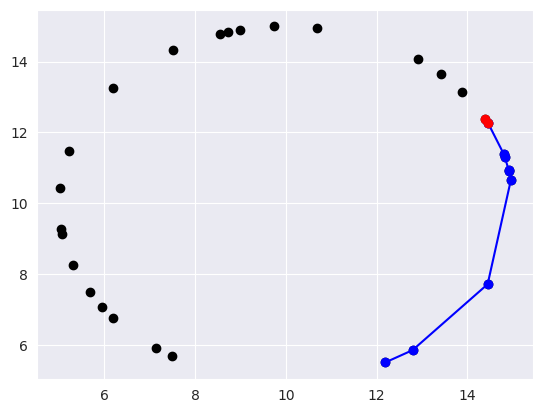

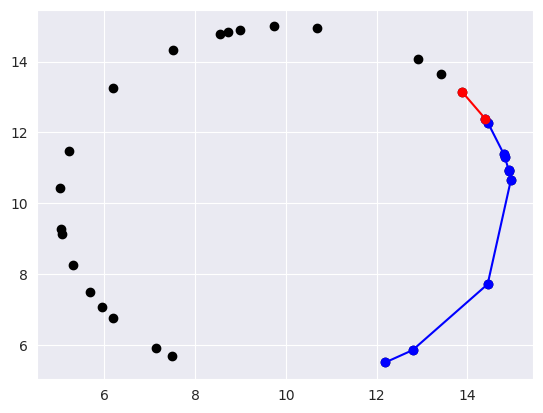

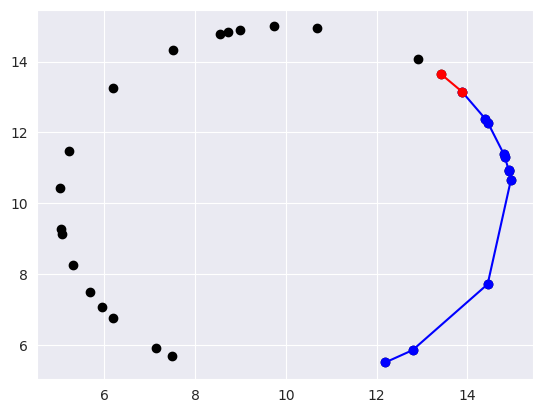

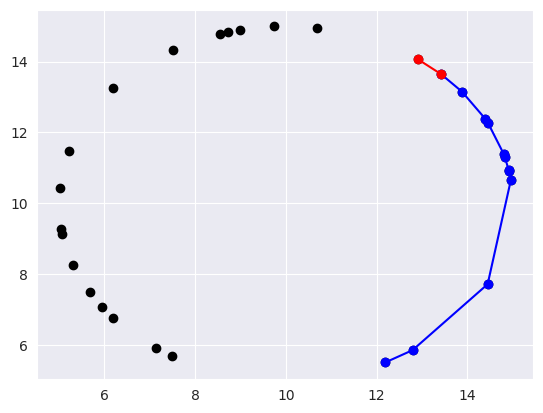

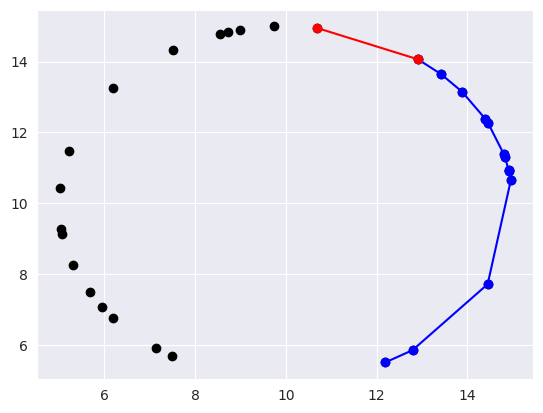

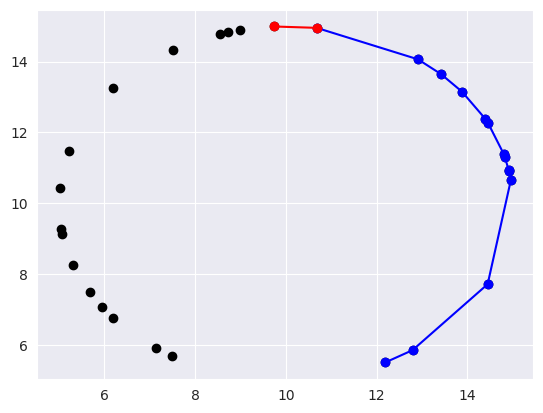

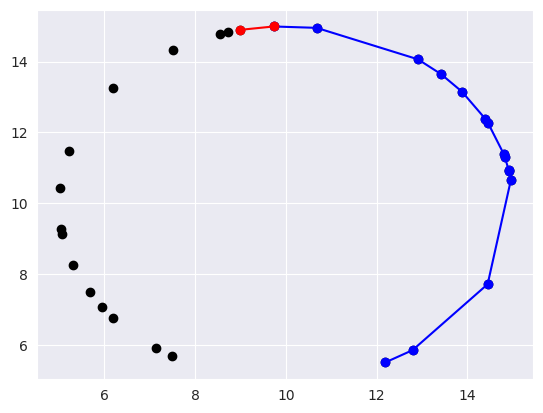

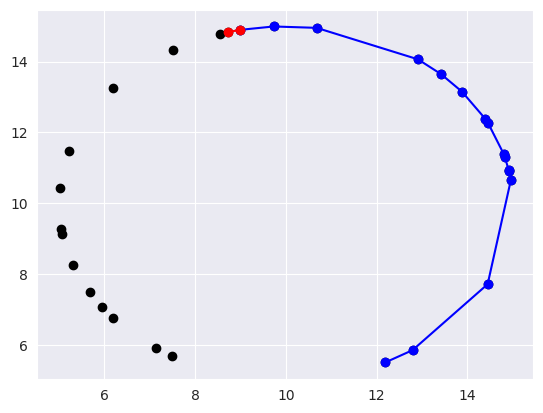

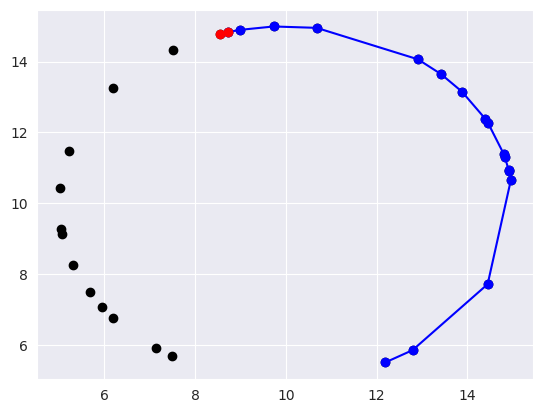

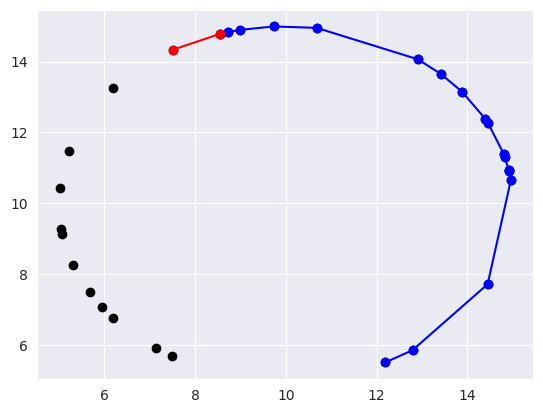

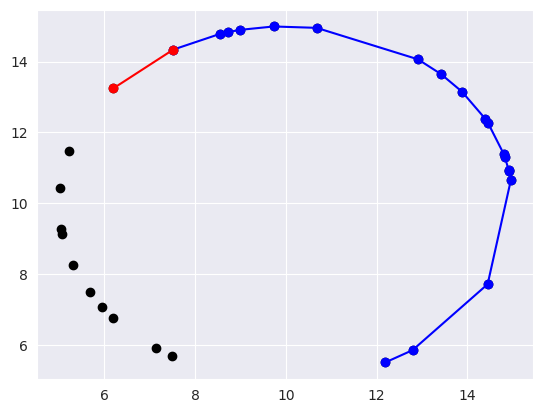

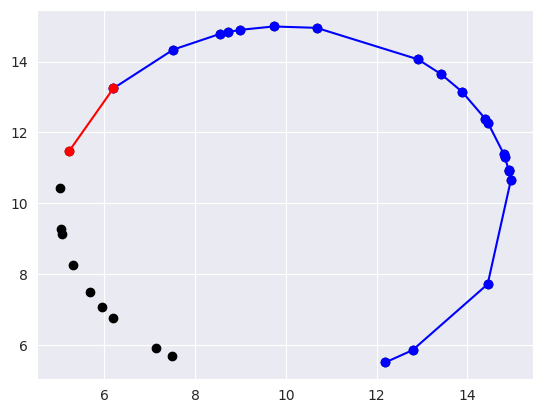

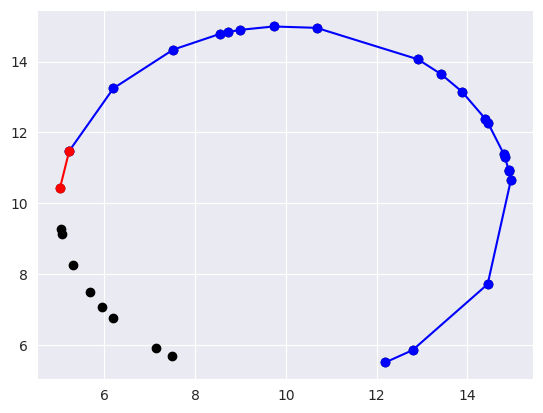

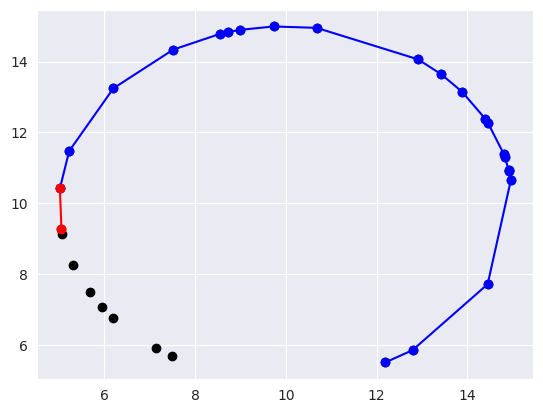

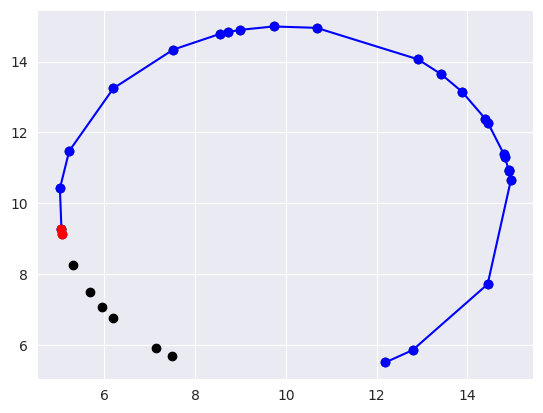

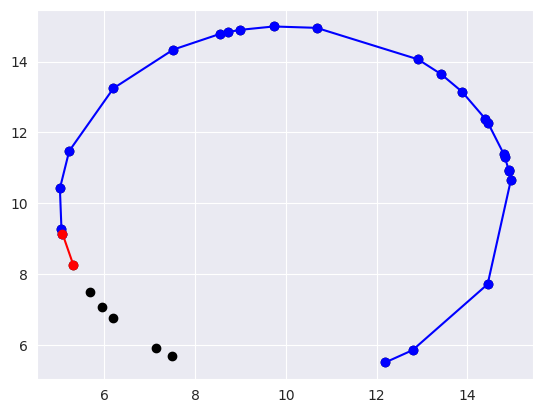

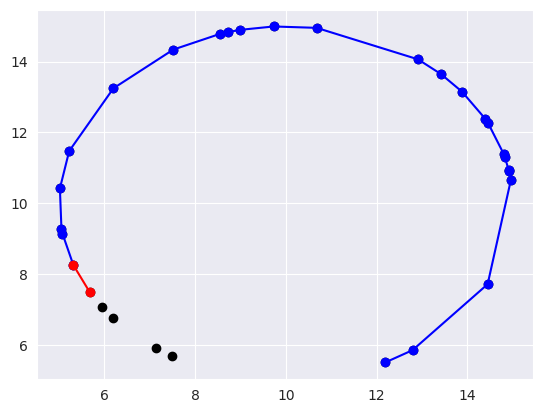

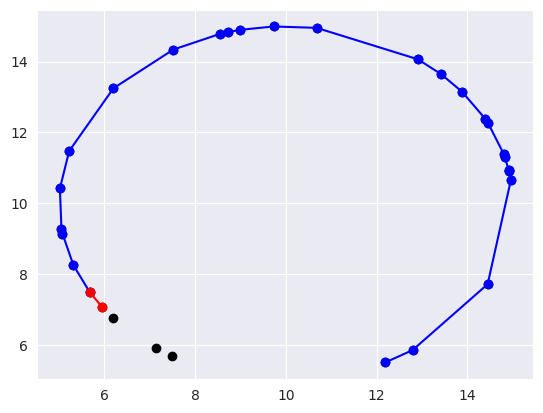

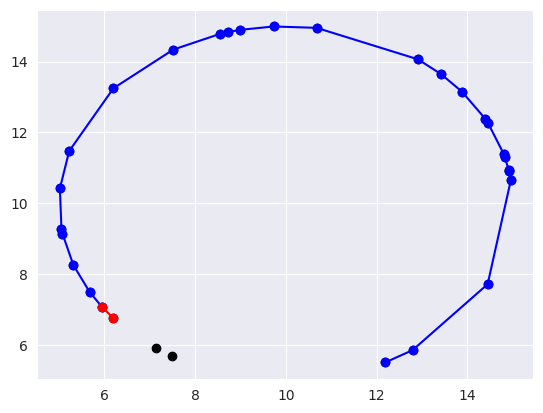

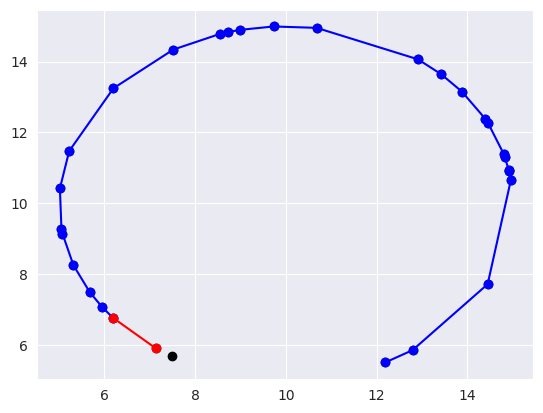

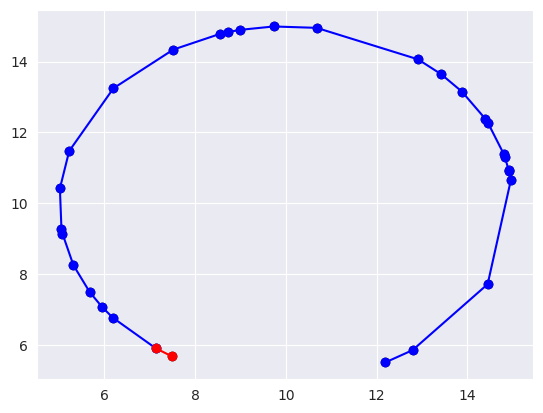

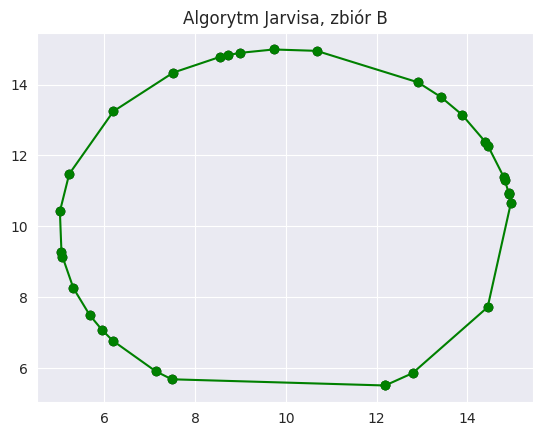

[[12.188419451700288,
  12.79178306082858,
  14.447413705537159,
  14.957868259280339,
  14.915681444420914,
  14.911467537118067,
  14.825265166905119,
  14.802770405657721,
  14.453246301734048,
  14.390878599434323,
  13.880396044448974,
  13.420685224038163,
  12.910557737741843,
  10.677100308489804,
  9.728819168430716,
  8.992648751204179,
  8.721406859039352,
  8.556491314252046,
  7.5166617647259875,
  6.197426161040381,
  5.2224018536107035,
  5.017593110193947,
  5.051823575594056,
  5.073880771286255,
  5.315478365063264,
  5.6767517245895,
  5.951406775963833,
  6.185508962065107,
  7.129929034954315,
  7.483866835202388],
 [5.504355407350375,
  5.851994775645696,
  7.715156169056573,
  10.647720868600462,
  10.914371881116168,
  10.936742564334184,
  11.310273280293888,
  11.390466263718166,
  12.273454942613121,
  12.39169085063887,
  13.153177213260422,
  13.646767417596985,
  14.065544693552278,
  14.953941377554141,
  14.99264067969941,
  14.897473171090322,
  14.8337

In [55]:
jarvis_algorithm(dataB, show_steps=True, final_plot="Algorytm Jarvisa, zbiór B")

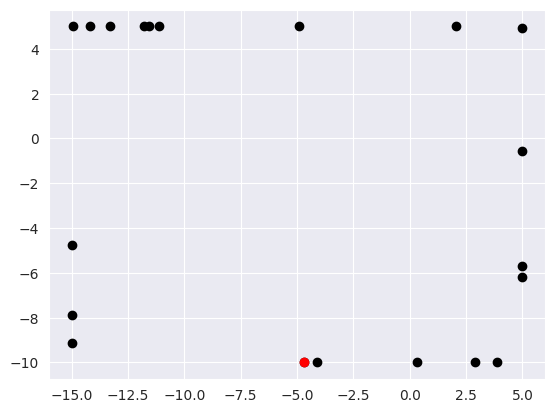

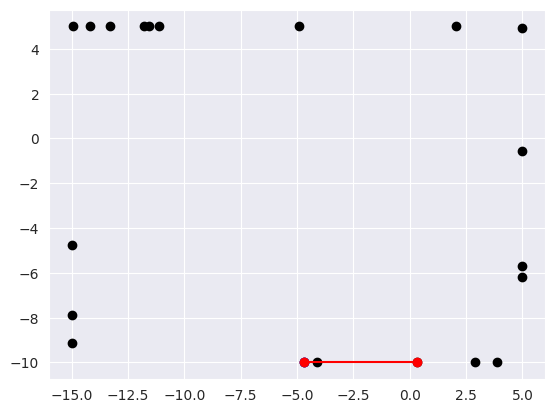

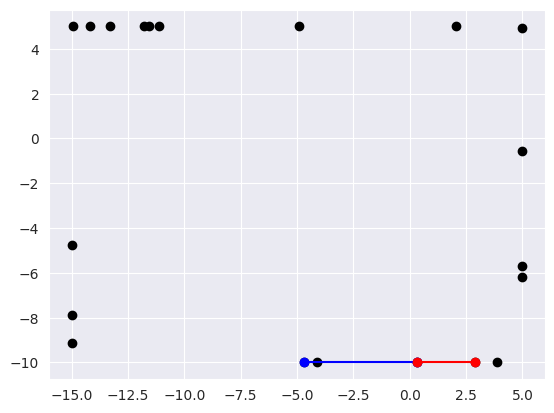

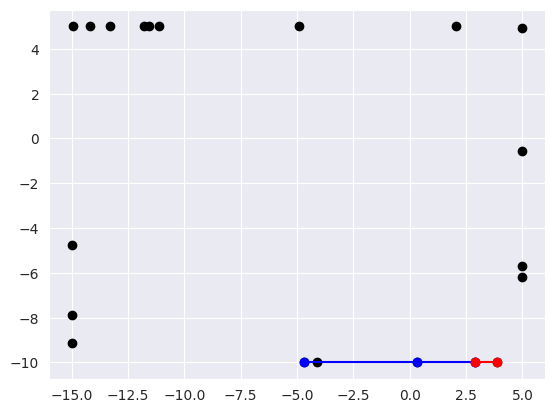

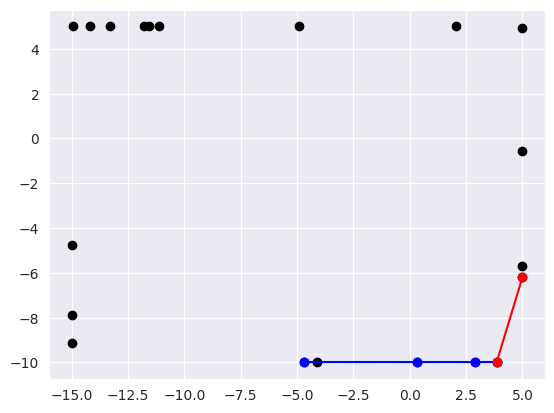

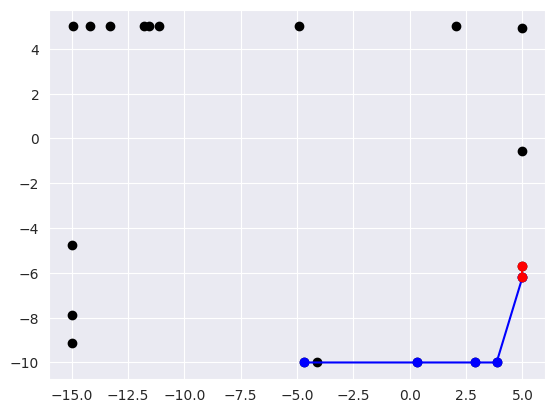

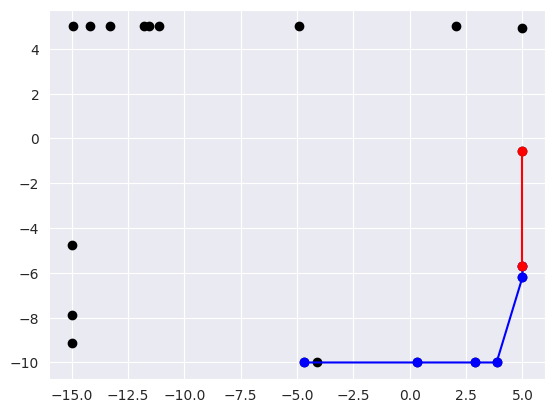

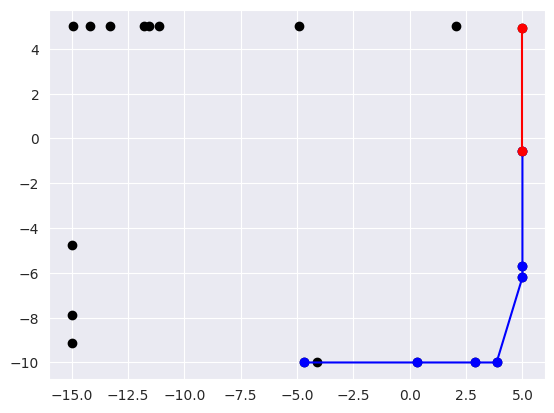

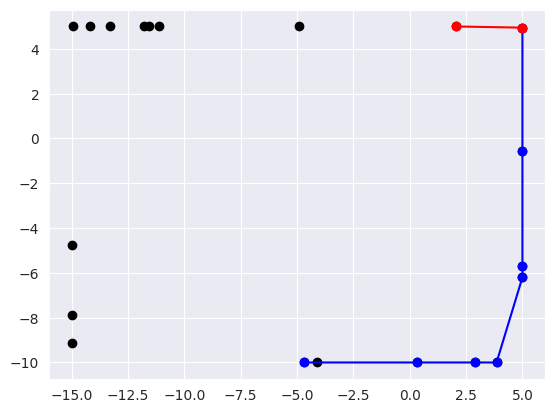

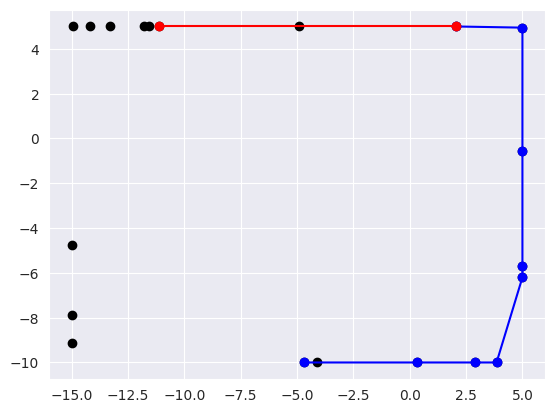

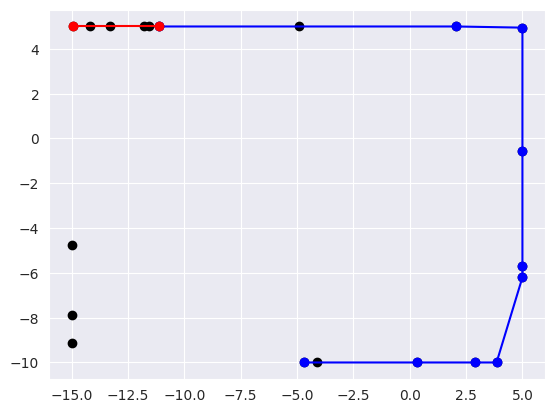

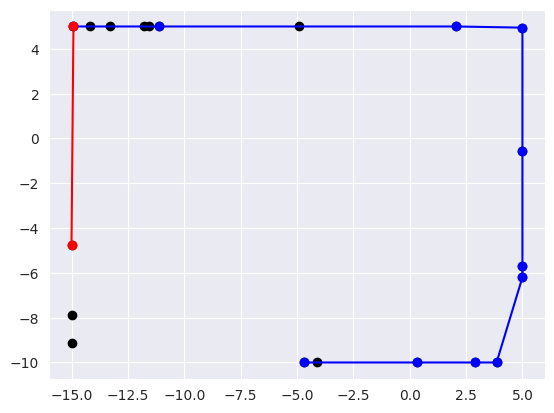

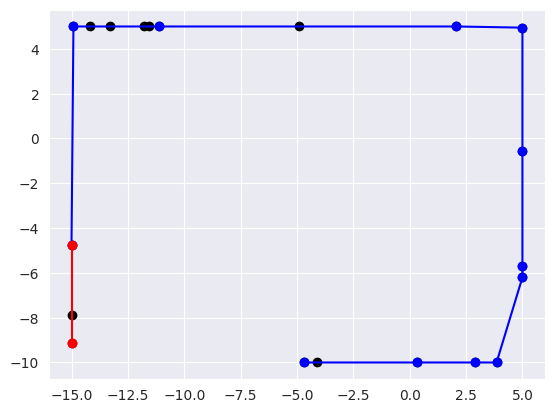

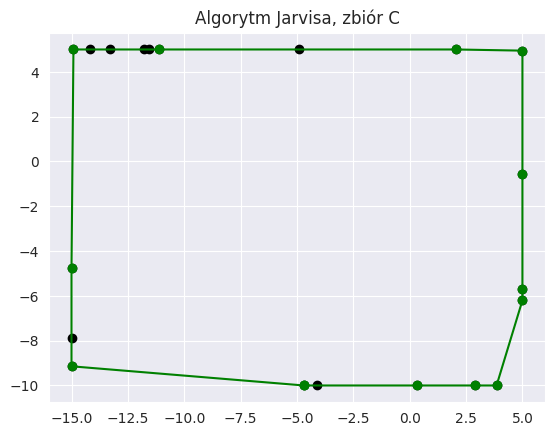

[[-4.692843395151478,
  0.3256185316343281,
  2.877808046605196,
  3.853125517591536,
  5.0,
  5.0,
  5.0,
  5.0,
  2.0642606713379834,
  -11.127137612069786,
  -14.915020911104982,
  -15.0,
  -15.0],
 [-10.0,
  -10.0,
  -10.0,
  -10.0,
  -6.199615152181368,
  -5.680174077740212,
  -0.5660003308214492,
  4.948232511347351,
  5.0,
  5.0,
  5.0,
  -4.775019794173631,
  -9.143593159015927]]

In [48]:
jarvis_algorithm(dataC, show_steps=True, final_plot="Algorytm Jarvisa, zbiór C")

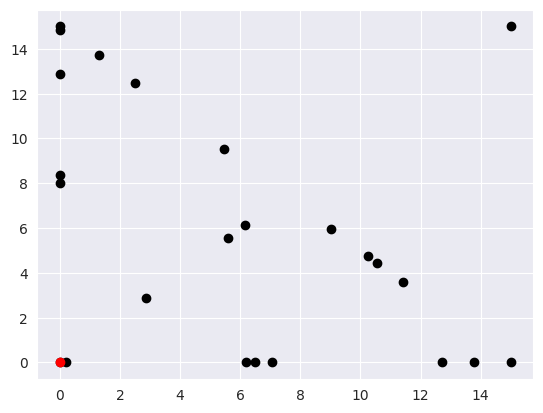

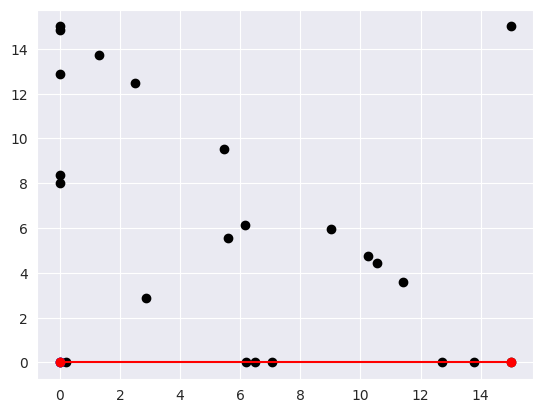

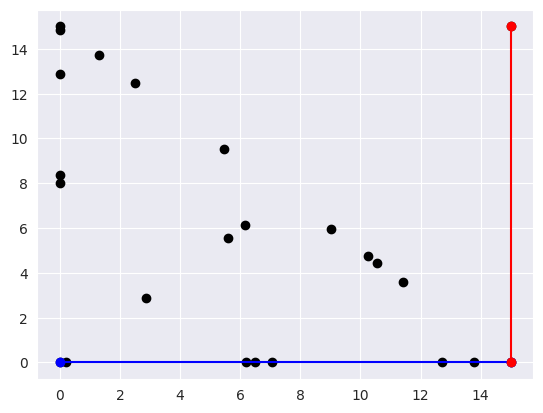

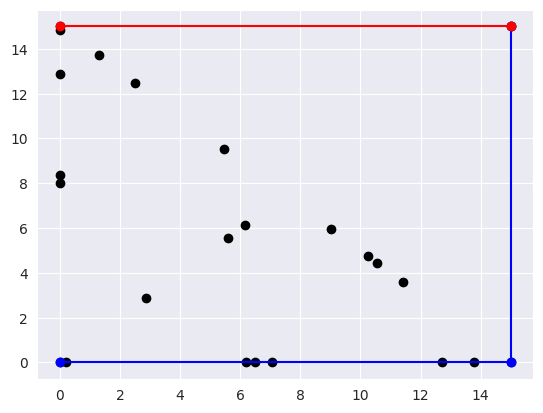

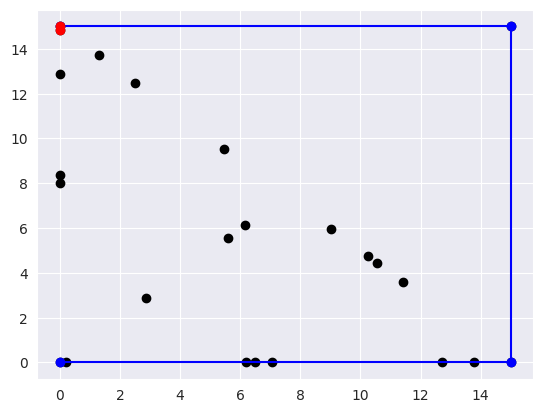

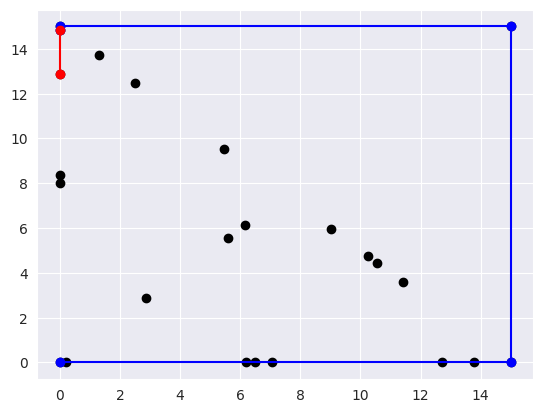

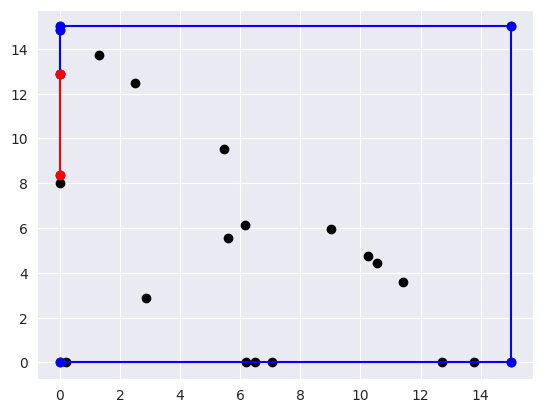

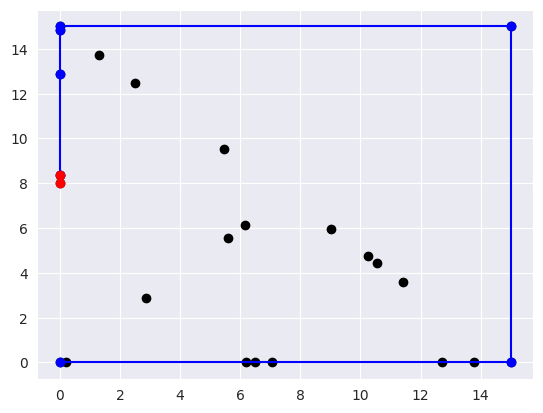

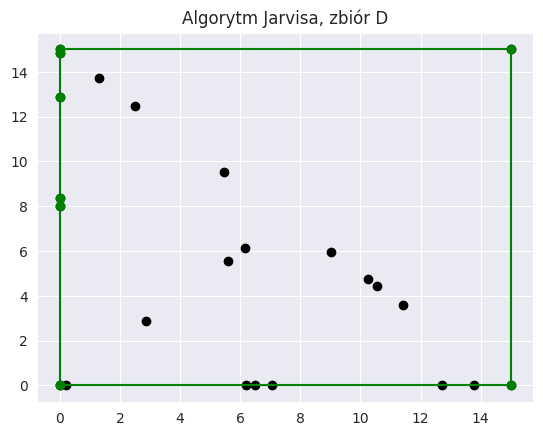

[[0.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0,
  0.0,
  15.0,
  15.0,
  14.836881928484472,
  12.881770592412881,
  8.374697212122927,
  8.002385104985976]]

In [49]:
jarvis_algorithm(dataD, show_steps=True, final_plot="Algorytm Jarvisa, zbiór D")

# Czas działania algorytmu

### Dla zad1.

In [69]:
name=["GRAHAM"]*4
time_table=[]
_ , t = graham_algorithm(table_a, measure_time=True)
time_table.append(t)
_ , t = graham_algorithm(table_b, measure_time=True)
time_table.append(t)
_, t = graham_algorithm(table_c, measure_time=True)
time_table.append(t)
_, t = graham_algorithm(table_d, measure_time=True)
time_table.append(t)

In [70]:
name+=["JARVIS"]*4
_, t = jarvis_algorithm(table_a, measure_time=True)
time_table.append(t)
_, t = jarvis_algorithm(table_b, measure_time=True)
time_table.append(t)
_, t = jarvis_algorithm(table_c, measure_time=True)
time_table.append(t)
_, t = jarvis_algorithm(table_d, measure_time=True)
time_table.append(t)

In [81]:
sets=["A","B","C","D"]*2

In [90]:
df = pd.DataFrame()
df['Algorytm']=name
df['Czas']=time_table
df['Zbiór']=sets

<AxesSubplot: xlabel='Zbiór', ylabel='Czas'>

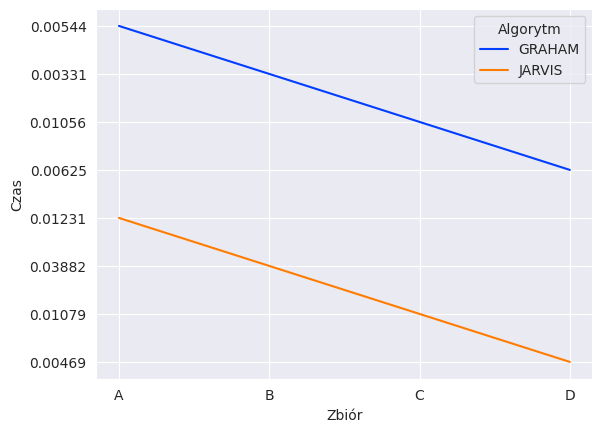

In [91]:
sns.lineplot(data=df,x='Zbiór',y='Czas', hue='Algorytm')

In [100]:
name=[]
time_table=[]
X=[]
for i in range(1000, 10000, 1000):
    _ , t = graham_algorithm(setA(i,-1000,1000), measure_time=True)
    time_table.append(t)
    name.append("GRAHAM")
    X.append(i)
    _ , t = jarvis_algorithm(setA(i,-1000,1000), measure_time=True)
    time_table.append(t)
    name.append("JARVIS")
    X.append(i)
    
df2 = pd.DataFrame()
df2['Algorytm']=name
df2['Czas']=time_table
df2['Liczba punktów']=X

<AxesSubplot: xlabel='Liczba punktów', ylabel='Czas'>

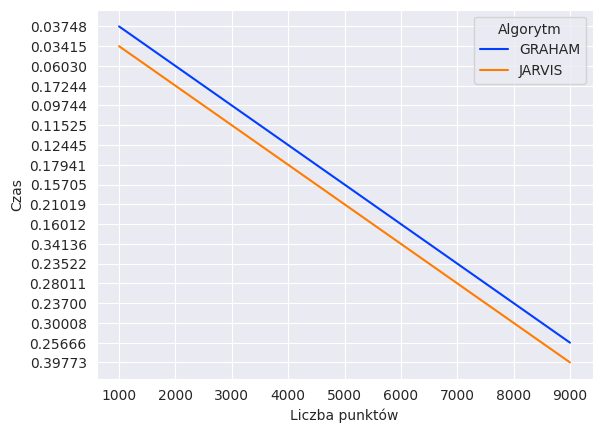

In [101]:
sns.lineplot(data=df2,x='Liczba punktów',y='Czas', hue='Algorytm')